# My coursework

In [503]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

# machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [456]:
dataset = pd.read_csv('train.csv', delimiter=',')
dataset

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0     14038          35    2.0  47.981561   29.442751            6.0      7   
1     15053          41    3.0  65.683640   40.049543            8.0      7   
2      4765          53    2.0  44.947953   29.197612            0.0      8   
3      5809          58    2.0  53.352981   52.731512            9.0      8   
4     10783          99    1.0  39.649192   23.776169            7.0     11   
...     ...         ...    ...        ...         ...            ...    ...   
9995     77          32    2.0  50.401785   30.476203            5.0      6   
9996   6159          18    1.0  41.521546   20.539216            9.0     13   
9997   5123          27    1.0  47.939008         NaN            1.0     12   
9998   5400          75    2.0  43.602562   33.840147            8.0      1   
9999   6306         128    1.0  38.666645   21.157874            8.0      7   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
0            9.0       1969   0.089040         B         B        33   
1            9.0       1978   0.000070         B         B        46   
2           12.0       1968   0.049637         B         B        34   
3           17.0       1977   0.437885         B         B        23   
4           12.0       1976   0.012339         B         B        35   
...          ...        ...        ...       ...       ...       ...   
9995         5.0       1968   0.135650         B         B        46   
9996        13.0       2000   0.000000         B         B        30   
9997        16.0       2015   0.072158         B         B         2   
9998         5.0       1961   0.307467         B         A        30   
9999        17.0       1990   0.000000         B         B        27   

      Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
0         7976         5           NaN            0       11       B   
1        10309         1         240.0            1       16       B   
2         7759         0         229.0            1        3       B   
3         5735         3        1084.0            0        5       B   
4         5776         1        2078.0            2        4       B   
...        ...       ...           ...          ...      ...     ...   
9995      7960         6         350.0            3       11       B   
9996      5562         0           NaN            0        5       A   
9997       629         1           NaN            0        0       A   
9998      5048         9         325.0            2        5       B   
9999      4798         0          30.0            2        8       B   

              Price  
0     184966.930730  
1     300009.450063  
2     220925.908524  
3     175616.227217  
4     150226.531644  
...             ...  
9995  196684.316040  
9996  189050.289571  
9997  159143.805370  
9998  181595.339808  
9999  218714.077615  

[10000 rows x 20 columns]

In [325]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [326]:
dataset.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [327]:
dataset.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [328]:
dataset.HouseYear.min()

1910

In [329]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [330]:
dataset = reduce_mem_usage(dataset)
dataset.info()

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.35 MB
Decreased by 76.9%
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float16 
 3   Square         10000 non-null  float16 
 4   LifeSquare     7887 non-null   float16 
 5   KitchenSquare  10000 non-null  float16 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float16 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float16 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 no

In [331]:
dataset.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [332]:
dataset[dataset.Rooms == 0].count().Id

8

In [333]:
# Проверим есть ли  среди комнат не целое число
dataset[dataset.Rooms % 1 != 0].count().Id

0

In [334]:
dataset.Rooms.unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.], dtype=float16)

In [335]:
dataset.Rooms = dataset.Rooms.astype(np.int8)

In [336]:
dataset.Rooms.dtype

dtype('int8')

In [337]:
dataset['HouseAge'] = datetime.datetime.now().year - dataset['HouseYear']
dataset['HouseAge'].head(10)

0    51
1    42
2    52
3    43
4    44
5     9
6    60
7    43
8    43
9     6
Name: HouseAge, dtype: int32

In [338]:
dataset['HouseAge'].mean(), dataset['HouseAge'].max(), dataset['HouseAge'].min()

(-1970.1663, 110, -20049991)

In [339]:
dataset[dataset['HouseAge'] == 0].count().Id

19

In [340]:
dataset[dataset['HouseAge'] < 0].count().Id

2

In [341]:
# изменяем отрицательный возраст домов на 0
dataset.loc[dataset['HouseAge'] < 0, 'HouseAge'] = 0

In [342]:
dataset[dataset['HouseAge'] == 0].count().Id

21

In [343]:
dataset['HouseAge'].mean()

35.1276

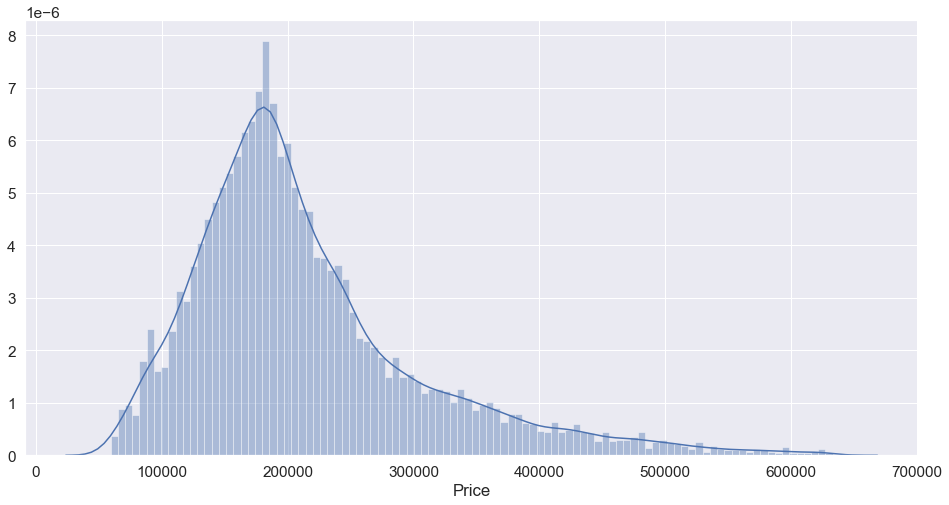

In [344]:
plt.figure(figsize = (16, 8))
sns.distplot(dataset['Price'], bins=100)

In [345]:
import warnings
warnings.filterwarnings('ignore')

In [346]:
ds_features = dataset.drop(['Id', 'Price'], axis=1)

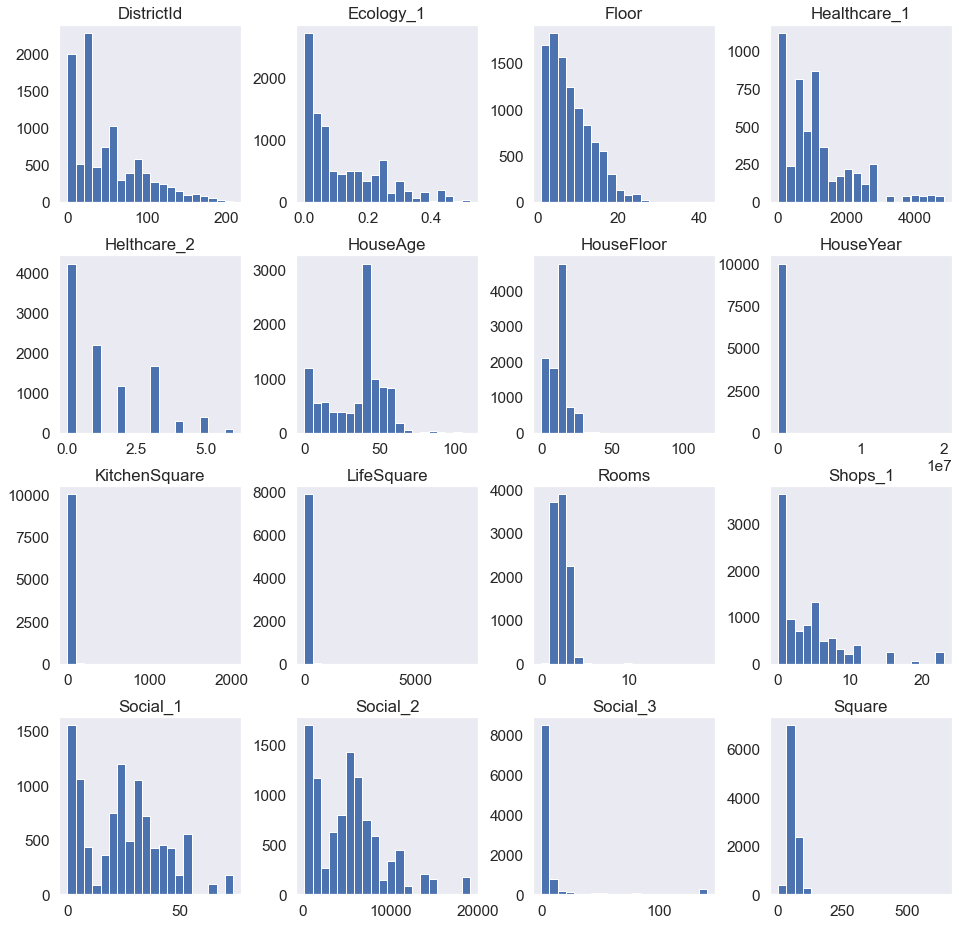

In [347]:
ds_features.hist(figsize=(16,16), bins=20, grid=False);

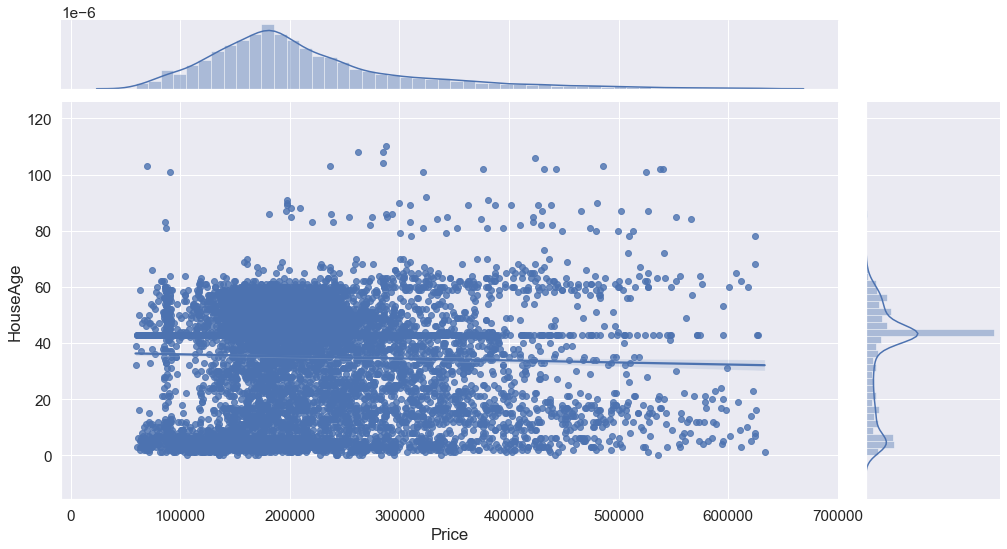

In [348]:
grid = sns.jointplot(dataset['Price'], dataset['HouseAge'], kind='reg')
grid.fig.set_figwidth(16)
grid.fig.set_figheight(8)

plt.show()

### Из графика выше напрямую зависимость цены от возраста домов не наблюдается

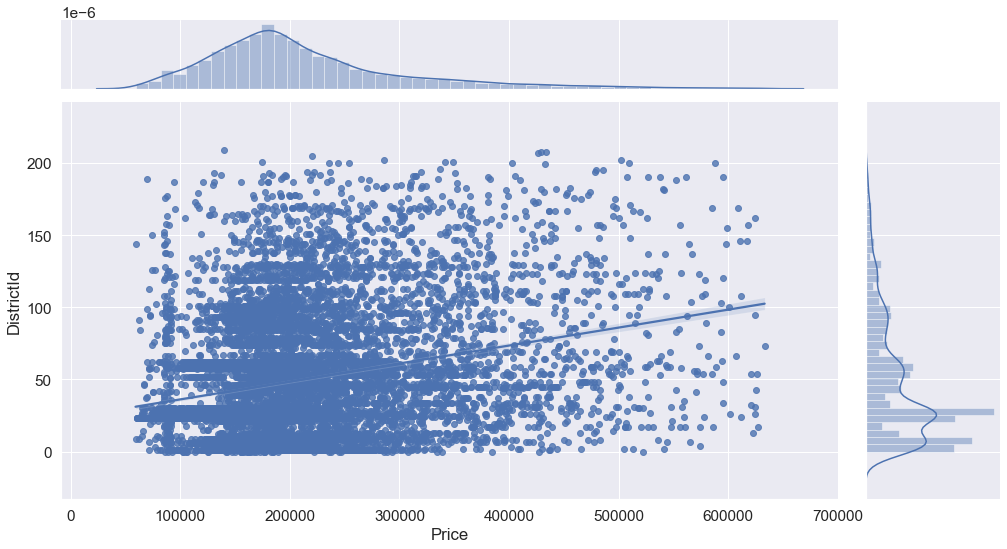

In [349]:
grid = sns.jointplot(dataset['Price'], dataset['DistrictId'], kind='reg')
grid.fig.set_figwidth(16)
grid.fig.set_figheight(8)

plt.show()

### Из графика выше напрямую зависимость цены от района не наблюдается

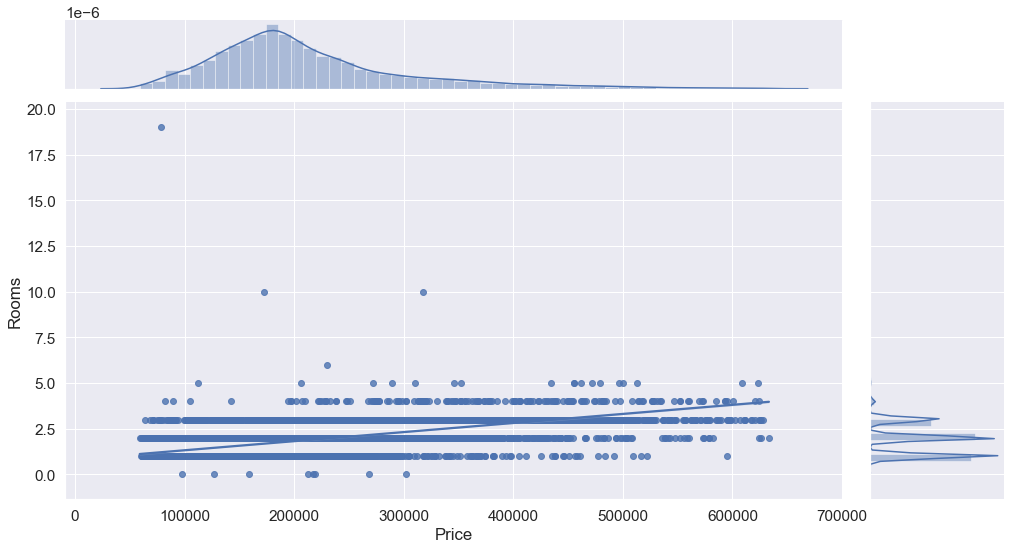

In [350]:
grid = sns.jointplot(dataset['Price'], dataset['Rooms'], kind='reg')
grid.fig.set_figwidth(16)
grid.fig.set_figheight(8)

plt.show()

### Выбросы значений комнат 19, 10, 6, 0

In [351]:
dataset.Rooms.median()

2.0

In [352]:
dataset.loc[dataset.Rooms > 5, 'Rooms'] = dataset.Rooms.median()
dataset.loc[dataset.Rooms == 0, 'Rooms'] = dataset.Rooms.median()

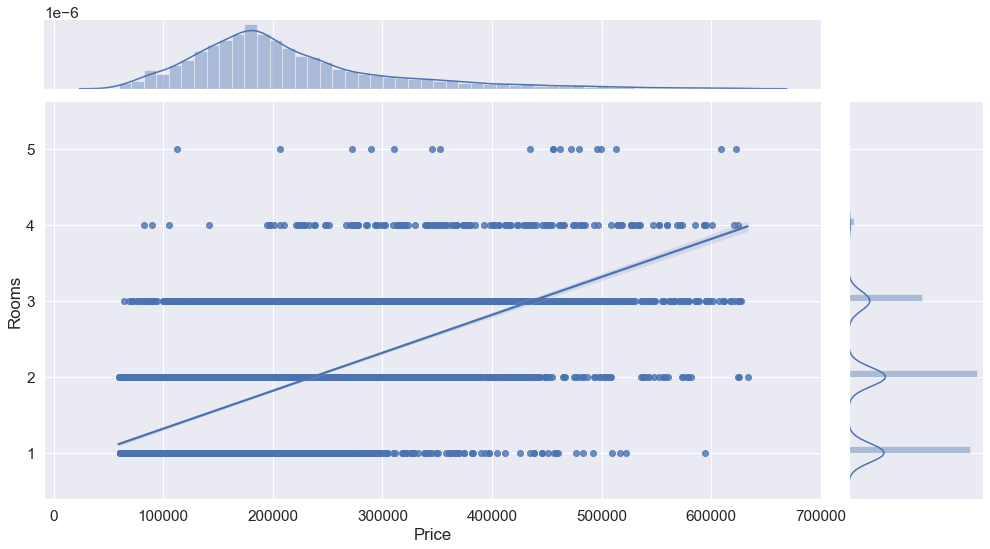

In [353]:
grid = sns.jointplot(dataset['Price'], dataset['Rooms'], kind='reg')
grid.fig.set_figwidth(16)
grid.fig.set_figheight(8)

plt.show()

### В целом заметна корреляция между ценой и количеством комнат

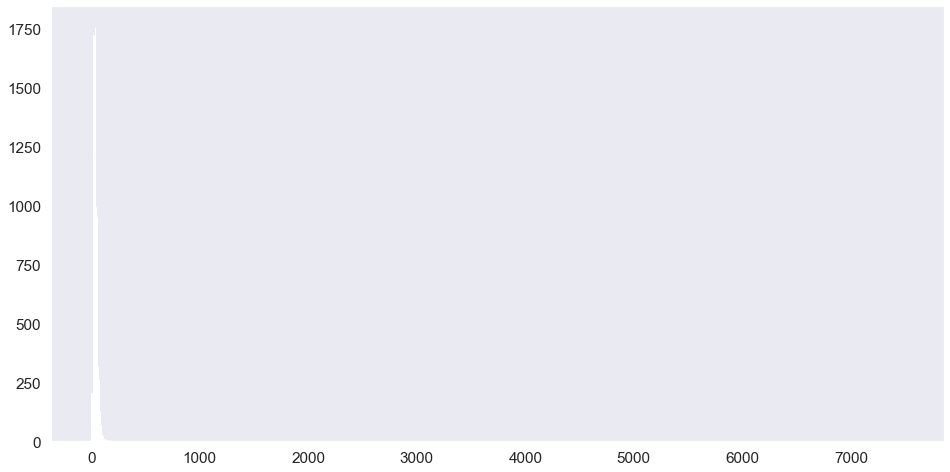

In [354]:
dataset.LifeSquare.hist(figsize=(16, 8), bins=1000, grid=False);

### Присутствует огромный выброс

In [355]:
dataset.LifeSquare.min()

0.3706

In [356]:
dataset.LifeSquare.max()

7480.0

In [357]:
dataset.LifeSquare.mean()

inf

In [358]:
dataset.LifeSquare.median()

32.78

In [359]:
dataset.LifeSquare.count()

7887

In [360]:
dataset[dataset.LifeSquare > 100].count()

Id               62
DistrictId       62
Rooms            62
Square           62
LifeSquare       62
KitchenSquare    62
Floor            62
HouseFloor       62
HouseYear        62
Ecology_1        62
Ecology_2        62
Ecology_3        62
Social_1         62
Social_2         62
Social_3         62
Healthcare_1     23
Helthcare_2      62
Shops_1          62
Shops_2          62
Price            62
HouseAge         62
dtype: int64

In [361]:
df_1room = dataset[dataset.Rooms == 1]
df_2room = dataset[dataset.Rooms == 2]
df_3room = dataset[dataset.Rooms == 3]
df_4room = dataset[dataset.Rooms == 4]
df_5room = dataset[dataset.Rooms == 5]

df_1room.head(10)

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
4   10783          99    1.0  39.65625   23.781250            7.0     11   
9    8649          23    1.0  46.46875   18.921875            8.0     13   
14  10953          27    1.0  53.78125   52.406250            1.0      5   
18   2829          57    1.0  44.50000   23.109375            8.0      6   
22  11852          48    1.0  41.65625   20.203125           10.0     19   
28   8054          23    1.0  42.53125   43.968750            1.0      3   
31   4785          61    1.0  41.75000   19.343750            9.0     12   
33  13905          44    1.0  34.78125   18.203125            6.0      7   
36  11703          23    1.0  41.12500         NaN            1.0      4   
47  14292         103    1.0  41.53125   23.296875            8.0      7   

    HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
4         12.0       1976   0.012337  ...         B       35      5776   
9         17.0       2014   0.075806  ...         B        6      1437   
14         4.0       1977   0.072144  ...         B        2       629   
18        12.0       1983   0.133179  ...         B       49     11395   
22        22.0       1996   0.041138  ...         B       46      9515   
28         9.0       2014   0.034668  ...         B        0       168   
31        16.0       1984   0.300293  ...         B       52     10311   
33         9.0       1972   0.036133  ...         B       24      4378   
36        17.0       1977   0.075806  ...         B        6      1437   
47        16.0       1981   0.014420  ...         B       19      3806   

    Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
4          1        2078.0            2        4        B  150226.531250   
9          3           NaN            0        2        B   95380.218750   
14         1           NaN            0        0        A  140647.562500   
18         3        1406.0            3        4        A  183743.234375   
22         5           NaN            1       10        B  215083.968750   
28         0           NaN            0        0        B   95338.195312   
31         6           NaN            1        9        B  189007.234375   
33         0        1036.0            1        1        B  154928.812500   
36         3           NaN            0        2        B  103510.226562   
47         4           NaN            0        3        B  234052.265625   

    HouseAge  
4         44  
9          6  
14        43  
18        37  
22        24  
28         6  
31        36  
33        48  
36        43  
47        39  

[10 rows x 21 columns]

In [362]:
df_1room.LifeSquare.min(), df_1room.LifeSquare.max(), df_1room.LifeSquare.median()

(0.3706, 410.8, 21.66)

In [363]:
df_1room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3705 entries, 4 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             3705 non-null   int16   
 1   DistrictId     3705 non-null   int16   
 2   Rooms          3705 non-null   float64 
 3   Square         3705 non-null   float16 
 4   LifeSquare     2827 non-null   float16 
 5   KitchenSquare  3705 non-null   float16 
 6   Floor          3705 non-null   int8    
 7   HouseFloor     3705 non-null   float16 
 8   HouseYear      3705 non-null   int32   
 9   Ecology_1      3705 non-null   float16 
 10  Ecology_2      3705 non-null   category
 11  Ecology_3      3705 non-null   category
 12  Social_1       3705 non-null   int8    
 13  Social_2       3705 non-null   int16   
 14  Social_3       3705 non-null   int16   
 15  Healthcare_1   1804 non-null   float16 
 16  Helthcare_2    3705 non-null   int8    
 17  Shops_1        3705 non-null   in

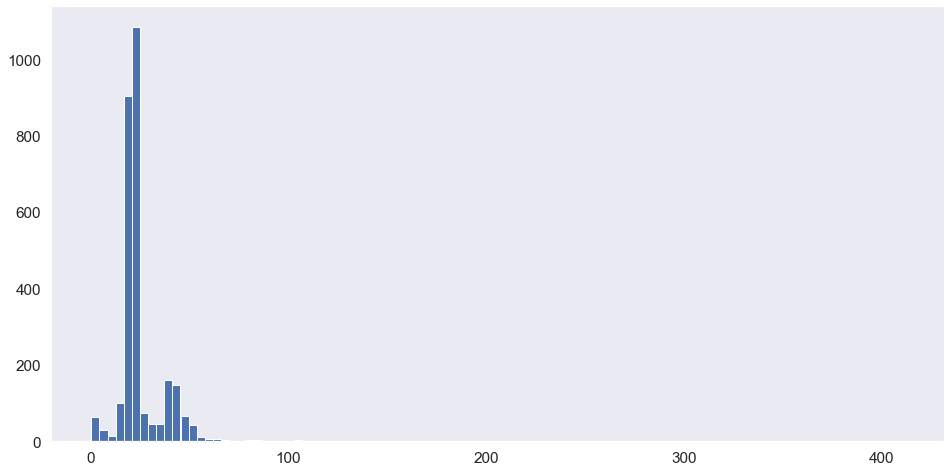

In [364]:
df_1room.LifeSquare.hist(figsize=(16, 8), bins=100, grid=False);

In [365]:
def sns_x_y(x, y):
    grid = sns.jointplot(x, y, kind='reg')
    grid.fig.set_figwidth(16)
    grid.fig.set_figheight(8)

    plt.show()

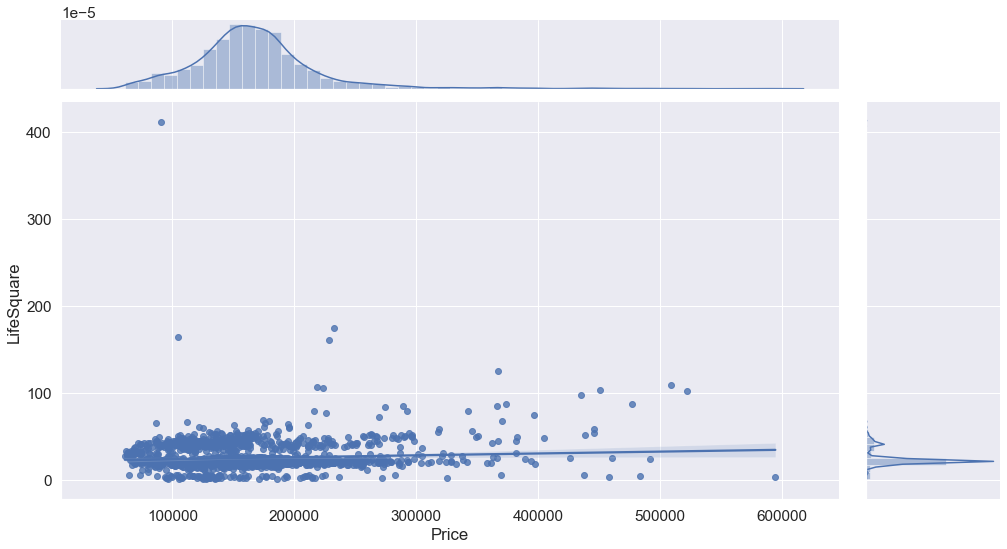

In [366]:
sns_x_y(df_1room['Price'], df_1room['LifeSquare'])

In [367]:
df_1room.loc[df_1room['LifeSquare'] >= 100, 'LifeSquare'] = df_1room.LifeSquare.median()
df_1room.loc[df_1room['LifeSquare'] < 10, 'LifeSquare'] = df_1room.LifeSquare.median()

In [368]:
df_1room.LifeSquare.median()

21.66

In [369]:
dataset[dataset['Rooms'] == 1].LifeSquare.median()

21.66

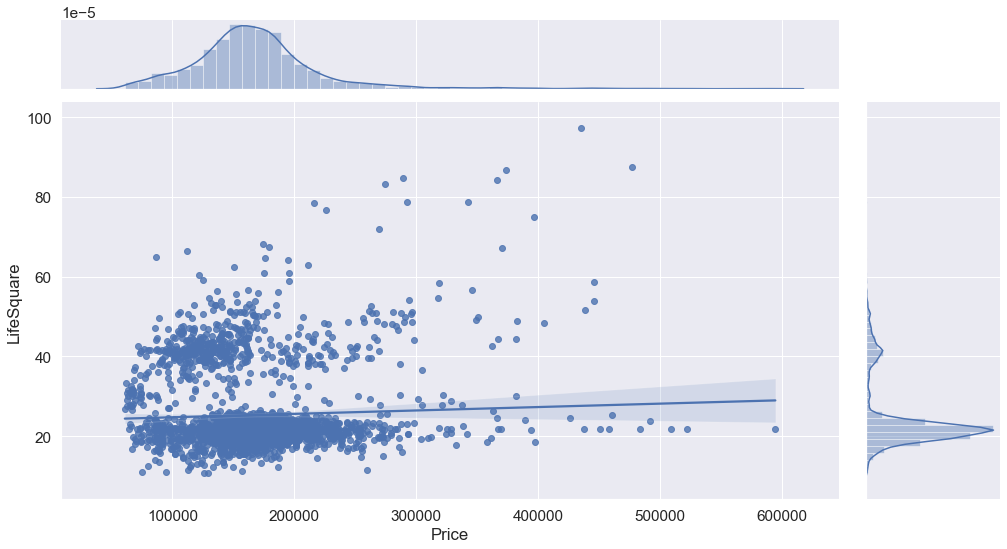

In [370]:
sns_x_y(df_1room['Price'], df_1room['LifeSquare'])

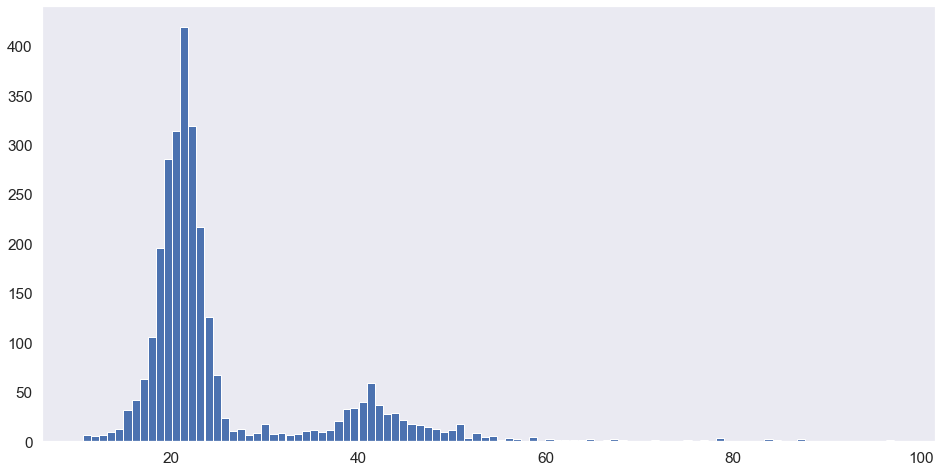

In [371]:
df_1room.LifeSquare.hist(figsize=(16, 8), bins=100, grid=False);

In [372]:
df_2room.LifeSquare.min(), df_2room.LifeSquare.max(), df_2room.LifeSquare.median()

(0.7954, 638.0, 32.56)

In [373]:
df_2room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3892 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             3892 non-null   int16   
 1   DistrictId     3892 non-null   int16   
 2   Rooms          3892 non-null   float64 
 3   Square         3892 non-null   float16 
 4   LifeSquare     3061 non-null   float16 
 5   KitchenSquare  3892 non-null   float16 
 6   Floor          3892 non-null   int8    
 7   HouseFloor     3892 non-null   float16 
 8   HouseYear      3892 non-null   int32   
 9   Ecology_1      3892 non-null   float16 
 10  Ecology_2      3892 non-null   category
 11  Ecology_3      3892 non-null   category
 12  Social_1       3892 non-null   int8    
 13  Social_2       3892 non-null   int16   
 14  Social_3       3892 non-null   int16   
 15  Healthcare_1   2109 non-null   float16 
 16  Helthcare_2    3892 non-null   int8    
 17  Shops_1        3892 non-null   in

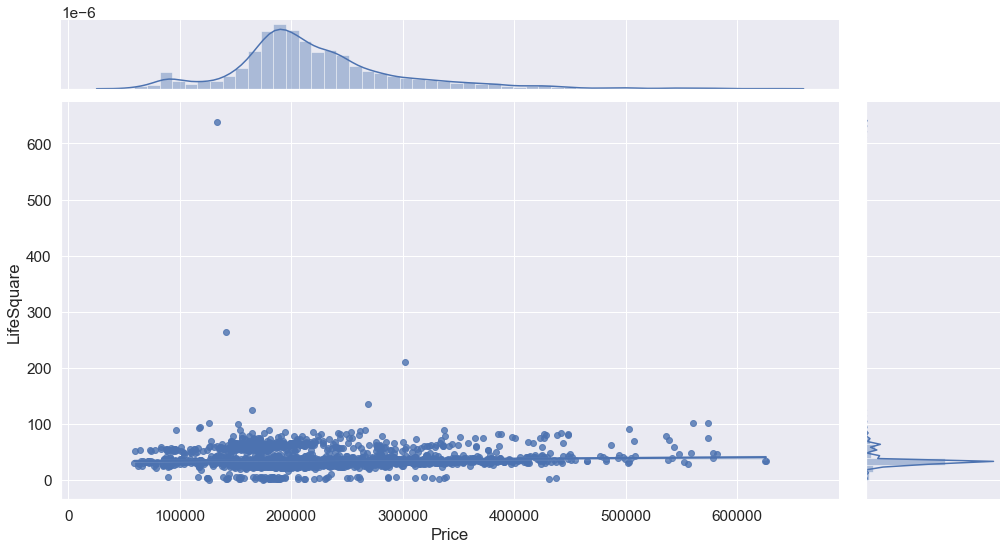

In [374]:
sns_x_y(df_2room['Price'], df_2room['LifeSquare'])

In [375]:
df_2room.loc[df_2room['LifeSquare'] >= 100, 'LifeSquare'] = df_2room.LifeSquare.median()
df_2room.loc[df_2room['LifeSquare'] < 20, 'LifeSquare'] = df_2room.LifeSquare.median()

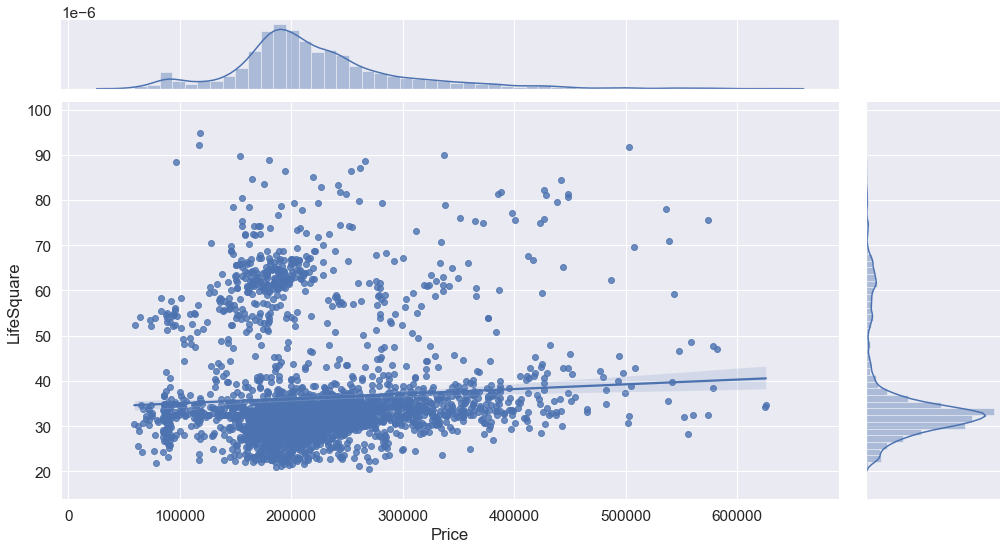

In [376]:
sns_x_y(df_2room['Price'], df_2room['LifeSquare'])

In [377]:
df_3room.LifeSquare.min(), df_3room.LifeSquare.max(), df_3room.LifeSquare.median()

(0.6416, 7480.0, 46.97)

In [378]:
df_3room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 1 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2235 non-null   int16   
 1   DistrictId     2235 non-null   int16   
 2   Rooms          2235 non-null   float64 
 3   Square         2235 non-null   float16 
 4   LifeSquare     1842 non-null   float16 
 5   KitchenSquare  2235 non-null   float16 
 6   Floor          2235 non-null   int8    
 7   HouseFloor     2235 non-null   float16 
 8   HouseYear      2235 non-null   int32   
 9   Ecology_1      2235 non-null   float16 
 10  Ecology_2      2235 non-null   category
 11  Ecology_3      2235 non-null   category
 12  Social_1       2235 non-null   int8    
 13  Social_2       2235 non-null   int16   
 14  Social_3       2235 non-null   int16   
 15  Healthcare_1   1193 non-null   float16 
 16  Helthcare_2    2235 non-null   int8    
 17  Shops_1        2235 non-null   in

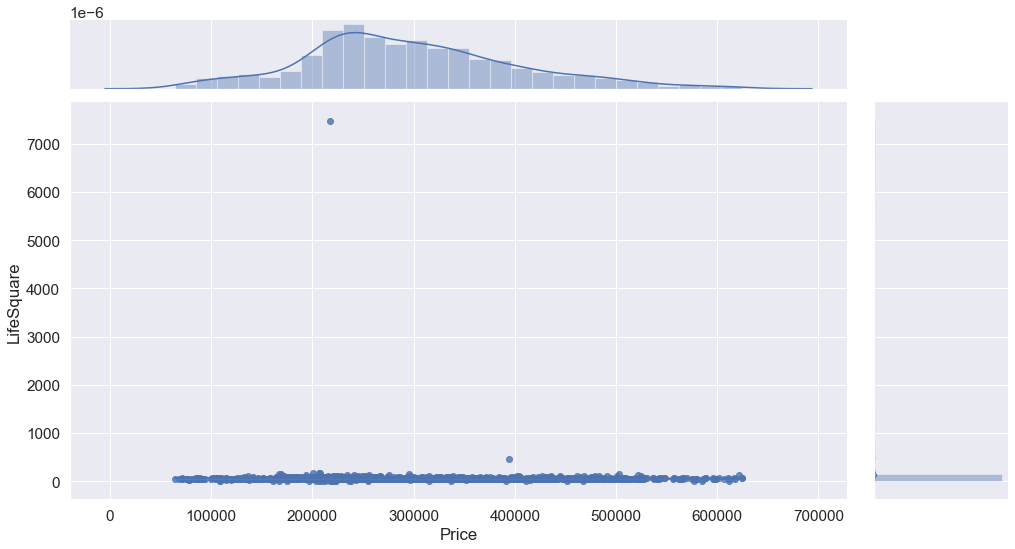

In [379]:
sns_x_y(df_3room['Price'], df_3room['LifeSquare'])

### Офигенный выброс)

In [380]:
df_3room.loc[df_3room['LifeSquare'] >= 500, 'LifeSquare'] = df_3room.LifeSquare.median()

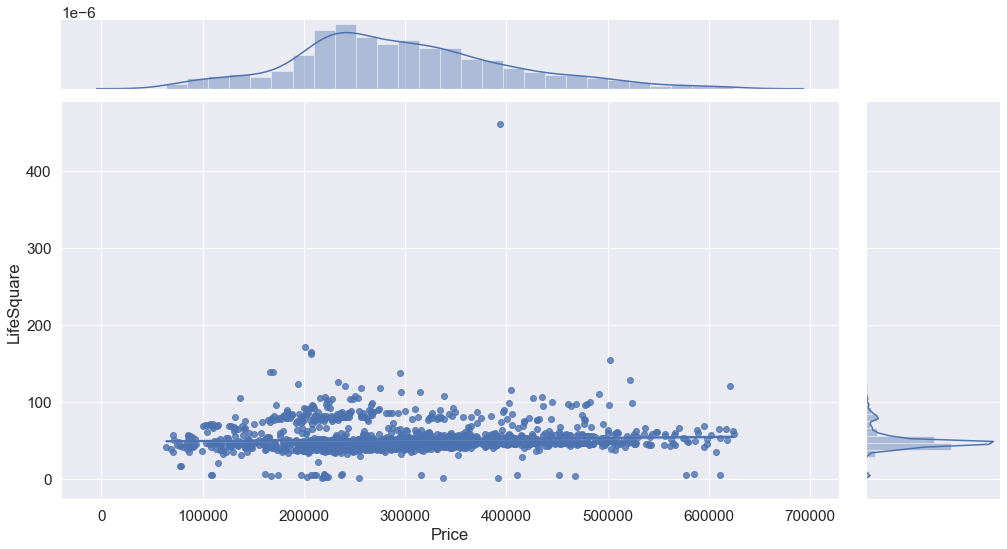

In [381]:
sns_x_y(df_3room['Price'], df_3room['LifeSquare'])

In [382]:
df_3room.loc[df_3room['LifeSquare'] >= 140, 'LifeSquare'] = df_3room.LifeSquare.median()
df_3room.loc[df_3room['LifeSquare'] < 30, 'LifeSquare'] = df_3room.LifeSquare.median()

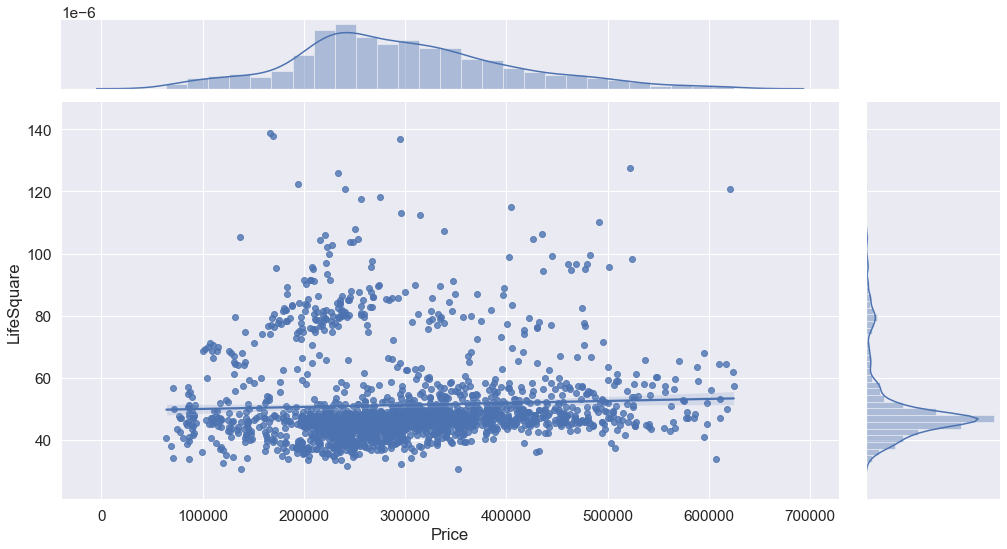

In [383]:
sns_x_y(df_3room['Price'], df_3room['LifeSquare'])

In [384]:
df_4room.LifeSquare.min(), df_4room.LifeSquare.max(), df_4room.LifeSquare.median()

(1.452, 201.6, 64.94)

In [385]:
df_4room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 77 to 9918
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int16   
 1   DistrictId     150 non-null    int16   
 2   Rooms          150 non-null    float64 
 3   Square         150 non-null    float16 
 4   LifeSquare     141 non-null    float16 
 5   KitchenSquare  150 non-null    float16 
 6   Floor          150 non-null    int8    
 7   HouseFloor     150 non-null    float16 
 8   HouseYear      150 non-null    int32   
 9   Ecology_1      150 non-null    float16 
 10  Ecology_2      150 non-null    category
 11  Ecology_3      150 non-null    category
 12  Social_1       150 non-null    int8    
 13  Social_2       150 non-null    int16   
 14  Social_3       150 non-null    int16   
 15  Healthcare_1   86 non-null     float16 
 16  Helthcare_2    150 non-null    int8    
 17  Shops_1        150 non-null    in

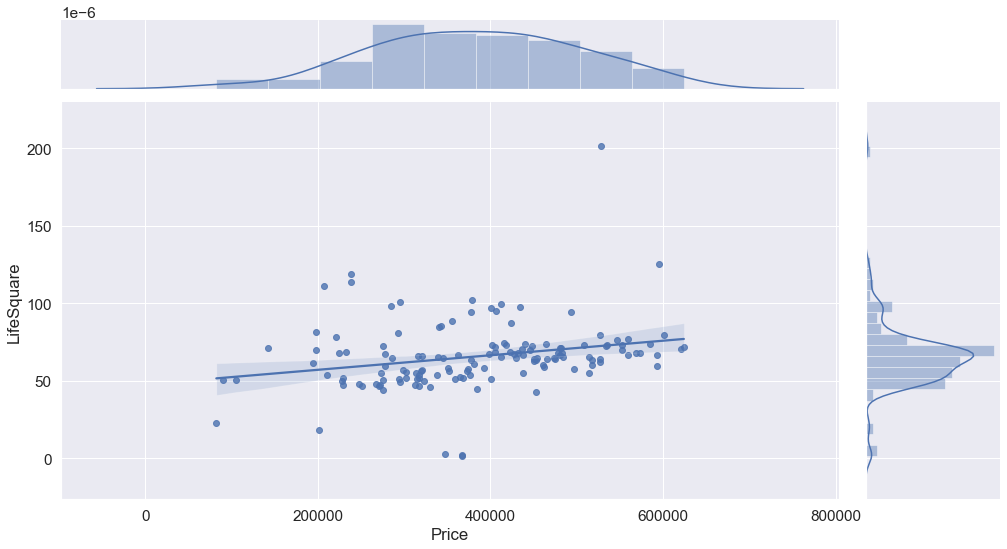

In [386]:
sns_x_y(df_4room['Price'], df_4room['LifeSquare'])

In [387]:
df_4room.loc[df_4room['LifeSquare'] > 150, 'LifeSquare'] = df_4room.LifeSquare.median()
df_4room.loc[df_4room['LifeSquare'] < 35, 'LifeSquare'] = df_4room.LifeSquare.median()

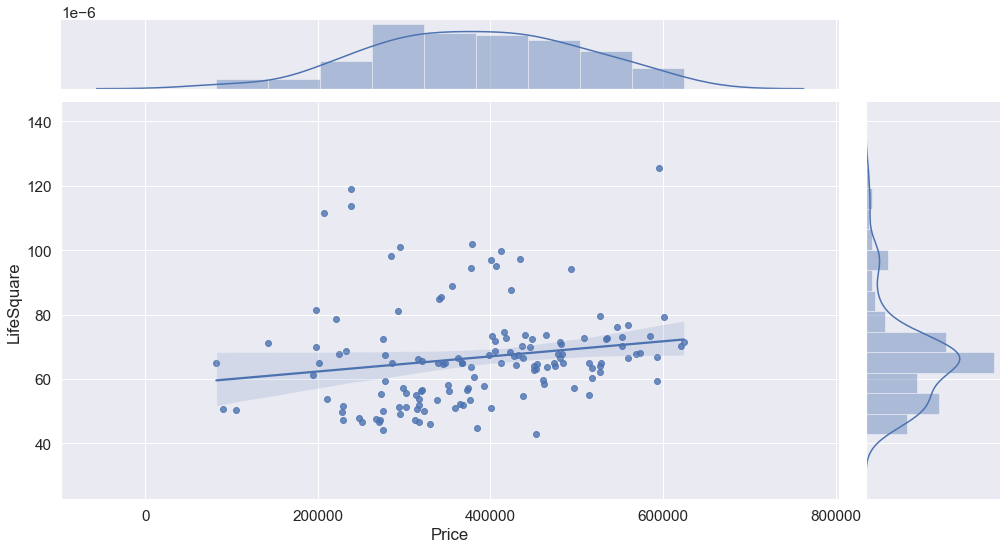

In [388]:
sns_x_y(df_4room['Price'], df_4room['LifeSquare'])

In [389]:
df_5room.LifeSquare.min(), df_5room.LifeSquare.max(), df_5room.LifeSquare.median()

(39.4, 234.0, 80.5)

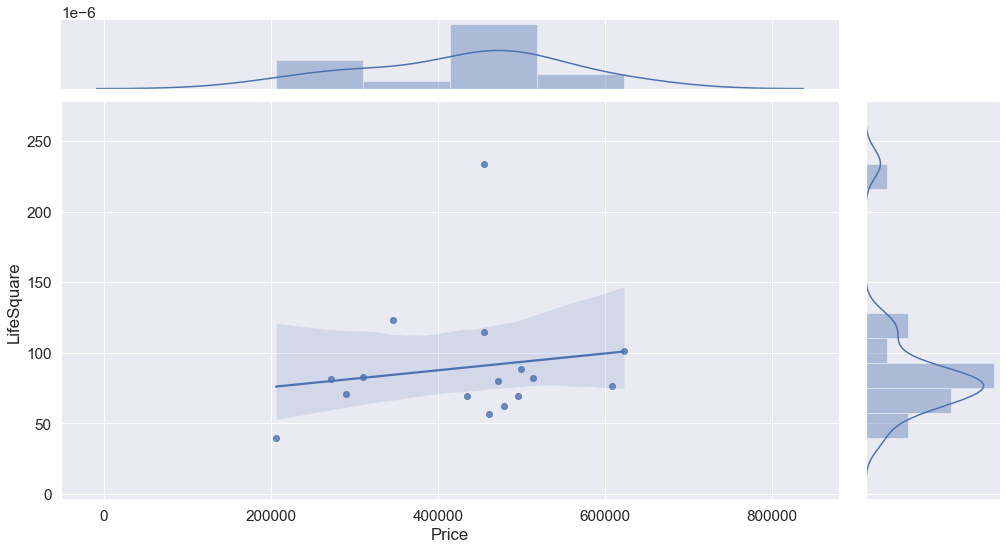

In [390]:
sns_x_y(df_5room['Price'], df_5room['LifeSquare'])

In [391]:
df_5room.loc[df_5room['LifeSquare'] > 200, 'LifeSquare'] = df_5room.LifeSquare.median()
df_5room.loc[df_5room['LifeSquare'] < 50, 'LifeSquare'] = df_5room.LifeSquare.median()

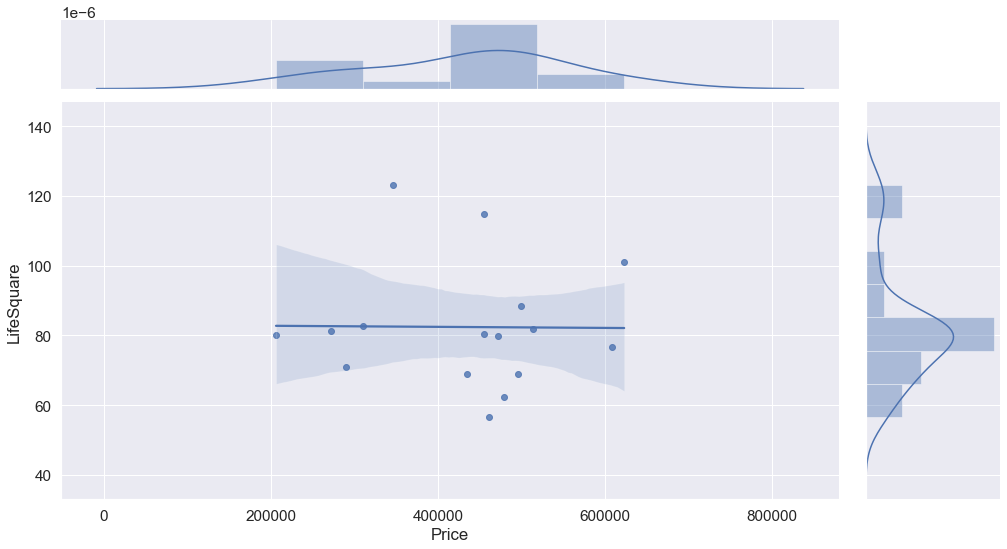

In [392]:
sns_x_y(df_5room['Price'], df_5room['LifeSquare'])

In [393]:
df_1room.LifeSquare = df_1room.LifeSquare.fillna(df_1room.LifeSquare.median())
df_1room.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3705 entries, 4 to 9999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             3705 non-null   int16   
 1   DistrictId     3705 non-null   int16   
 2   Rooms          3705 non-null   float64 
 3   Square         3705 non-null   float16 
 4   LifeSquare     3705 non-null   float16 
 5   KitchenSquare  3705 non-null   float16 
 6   Floor          3705 non-null   int8    
 7   HouseFloor     3705 non-null   float16 
 8   HouseYear      3705 non-null   int32   
 9   Ecology_1      3705 non-null   float16 
 10  Ecology_2      3705 non-null   category
 11  Ecology_3      3705 non-null   category
 12  Social_1       3705 non-null   int8    
 13  Social_2       3705 non-null   int16   
 14  Social_3       3705 non-null   int16   
 15  Healthcare_1   1804 non-null   float16 
 16  Helthcare_2    3705 non-null   int8    
 17  Shops_1        3705 non-null   in

In [394]:
df_2room.LifeSquare = df_2room.LifeSquare.fillna(df_2room.LifeSquare.median())
df_3room.LifeSquare = df_3room.LifeSquare.fillna(df_3room.LifeSquare.median())
df_4room.LifeSquare = df_4room.LifeSquare.fillna(df_4room.LifeSquare.median())
df_5room.LifeSquare = df_5room.LifeSquare.fillna(df_5room.LifeSquare.median())

In [395]:
df = pd.concat([df_1room, df_2room, df_3room, df_4room, df_5room])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 9699
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float64 
 3   Square         10000 non-null  float16 
 4   LifeSquare     10000 non-null  float16 
 5   KitchenSquare  10000 non-null  float16 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float16 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float16 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float16 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [396]:
df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

Square    LifeSquare  KitchenSquare
count  1.000000e+04  1.000000e+04   1.000000e+04
mean            inf           inf   6.273438e+00
std             inf  1.511719e+01            inf
min    1.136719e+00  1.064844e+01   0.000000e+00
25%    4.178125e+01  2.223047e+01   1.000000e+00
50%    5.250000e+01  3.256250e+01   6.000000e+00
75%    6.587500e+01  4.453125e+01   9.000000e+00
max    6.410000e+02  1.388750e+02   2.014000e+03

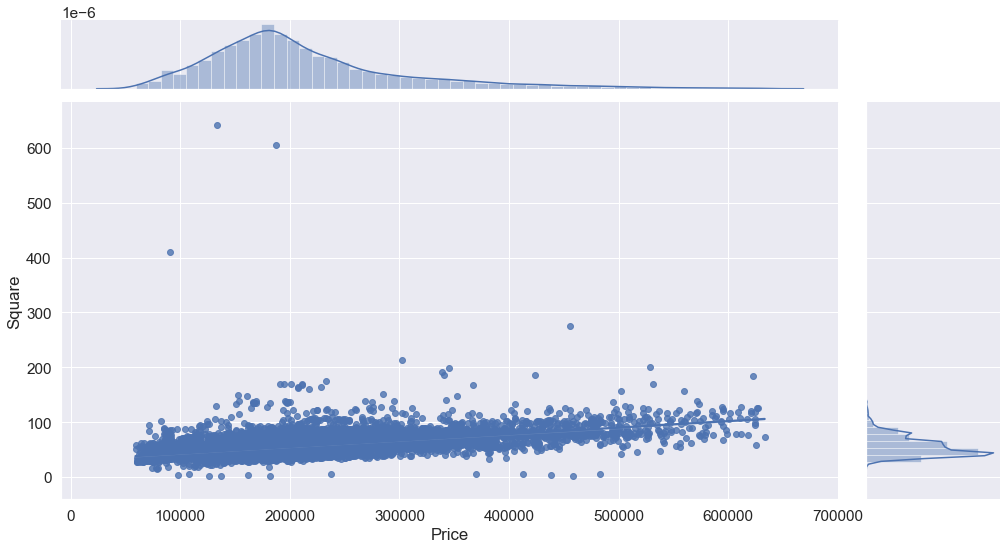

In [397]:
sns_x_y(df['Price'], df['Square'])

In [398]:
df['Square'].median()

52.5

In [399]:
df[df['Square'] > 250]

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
4690   2307         102    1.0  409.50    21.65625           10.0      4   
4262     28           9    2.0  604.50    32.56250            1.0     17   
6977  11602          30    2.0  641.00    32.56250           10.0     20   
1982   5548          86    5.0  275.75    80.50000           26.0     12   

      HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
4690         4.0       2016   0.238647  ...         B       26      3889   
4262        18.0       1977   0.161499  ...         B       25      5648   
6977        19.0       2019   0.000078  ...         B       22      6398   
1982        37.0       2011   0.161987  ...         A       31      7010   

      Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
4690         6         705.0            3        6        B   90470.429688   
4262         1          30.0            2        4        B  187717.250000   
6977       141        1046.0            3       23        B  133529.687500   
1982         5        4508.0            3        7        B  455264.875000   

      HouseAge  
4690         4  
4262        43  
6977         1  
1982         9  

[4 rows x 21 columns]

In [400]:
df.loc[df['Square'] > 250, 'Square'] = df['Square'].median()

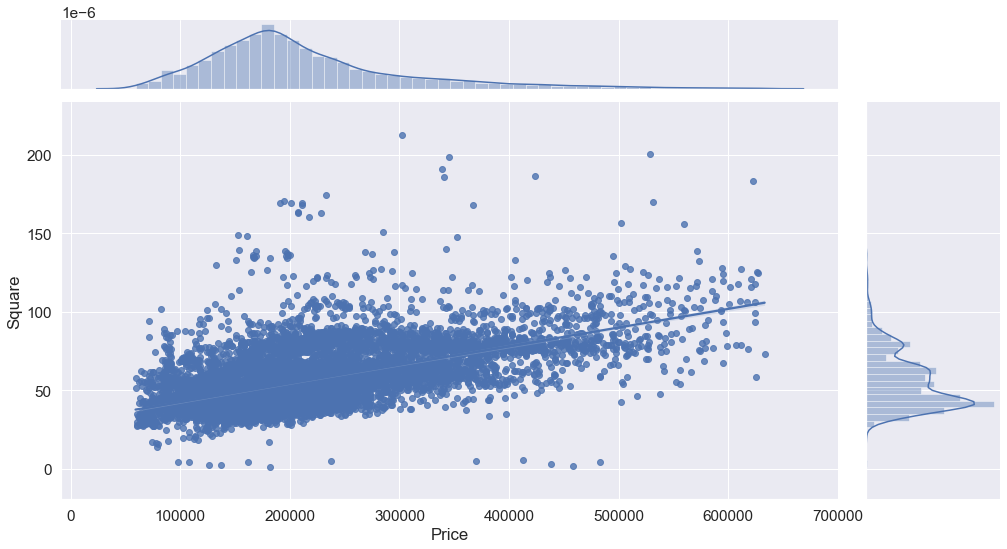

In [401]:
sns_x_y(df['Price'], df['Square'])

In [402]:
df[df['Square'] < 20]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1316  11526          27    1.0   4.632812   21.656250            1.0     18   
1608  10202           6    1.0   2.595703   21.656250            1.0      3   
1891  13685           0    1.0  17.500000   13.445312            0.0      7   
3166  15127         150    1.0  17.046875   20.031250            8.0      7   
3280  10527          27    1.0   4.378906   40.812500            1.0     10   
3413   9487           5    1.0   5.128906   21.656250            1.0      1   
3794    523         101    1.0  18.515625   15.171875            3.0      5   
6392  14786           1    1.0   1.136719   21.656250            1.0      3   
7767   6927          21    1.0  16.109375   21.656250            0.0      2   
7897  10635          21    1.0  18.984375   11.421875            2.0      1   
8283  15744          34    1.0   1.989258   21.656250            1.0     21   
9294   6782          45    1.0   2.955078   21.656250            1.0      3   
9516  14236           0    1.0  19.921875   15.539062            0.0      2   
9613   7657          38    1.0   4.503906   21.656250            1.0     28   
212    1748          88    2.0   5.496094   67.625000            1.0     24   
4853   3224          27    2.0   2.376953   32.562500            0.0      1   
6945  12927          62    2.0  17.421875   32.562500            1.0      4   
4739  12676          81    3.0  13.781250   46.968750            7.0      4   
4900   4504          27    3.0   4.390625   46.968750            1.0      8   
5617  15877          57    3.0  16.546875   46.968750            8.0      5   
8030  13265           1    3.0   4.824219   79.750000            0.0      6   

      HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
1316         1.0       1977   0.011658  ...         B        4       915   
1608        25.0       2014   0.243164  ...         B        5      1564   
1891         5.0       1961   0.319824  ...         B       25      4756   
3166        12.0       1982   0.300293  ...         B       52     10311   
3280        17.0       2013   0.211426  ...         B        9      1892   
3413         1.0       1977   0.150757  ...         B       16      3433   
3794         5.0       1970   0.225830  ...         B       41      6558   
6392         1.0       1977   0.007122  ...         B        1       264   
7767         5.0       1965   0.194458  ...         B       47      8004   
7897         5.0       1967   0.194458  ...         B       47      8004   
8283         4.0       1977   0.069763  ...         B       53     13670   
9294         1.0       1977   0.195801  ...         B       23      5212   
9516         5.0       1962   0.319824  ...         B       25      4756   
9613         1.0       1977   0.060760  ...         B       15      2787   
212         22.0       1977   0.127319  ...         B       43      8429   
4853         0.0       1977   0.017654  ...         B        2       469   
6945        20.0       1977   0.072144  ...         B        2       629   
4739         5.0       1960   0.319824  ...         B       25      4756   
4900        19.0       2016   0.211426  ...         B        9      1892   
5617         5.0       1962   0.133179  ...         B       49     11395   
8030        17.0       1977   0.007122  ...         B        1       264   

      Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
1316         0           NaN            0        0        B  107604.265625   
1608         0         540.0            0        0        B  137597.593750   
1891        16        2856.0            5        8        B   88871.750000   
3166         6           NaN            1        9        B   74222.109375   
3280         0           NaN            0        1        B   97560.718750   
3413         4        2644.0            4        5        B  369472.406250   
3794         7        1548.0            3        2 

In [403]:
df.loc[df['Square'] < 20, 'Square'] = df['Square'].median()

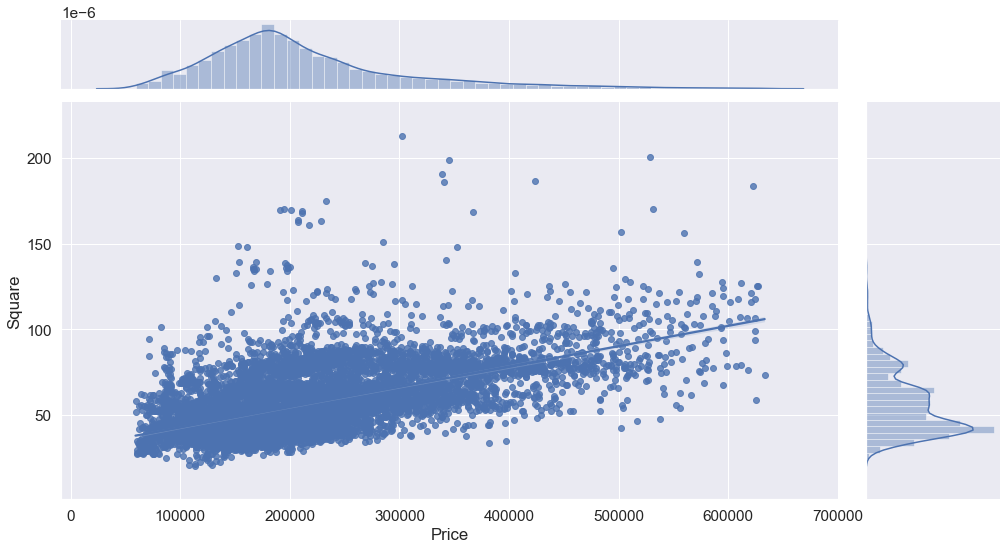

In [404]:
sns_x_y(df['Price'], df['Square'])

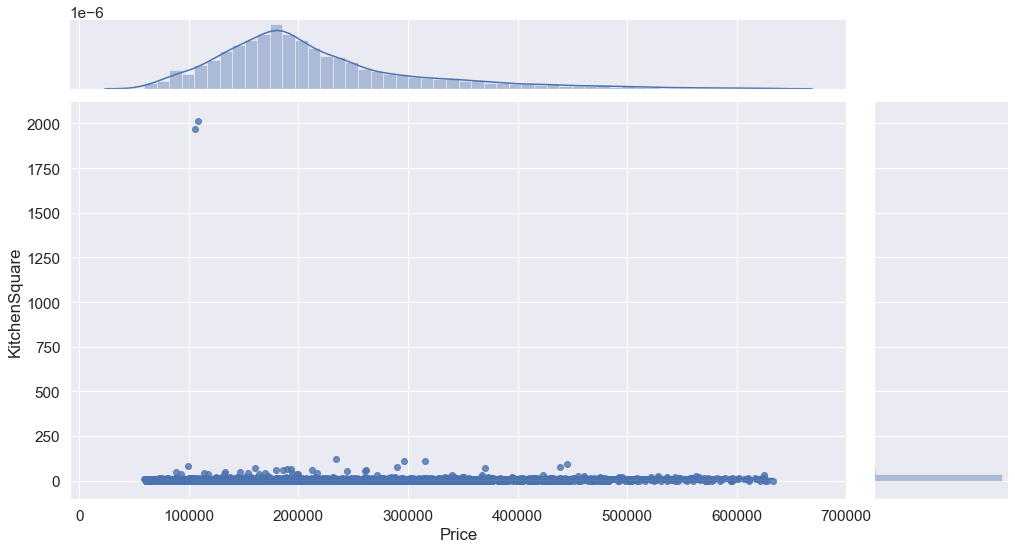

In [405]:
sns_x_y(df['Price'], df['KitchenSquare'])

In [406]:
df['KitchenSquare'].median()

6.0

In [407]:
df.loc[df['KitchenSquare'] >= 20, 'KitchenSquare'] = df['KitchenSquare'].median()

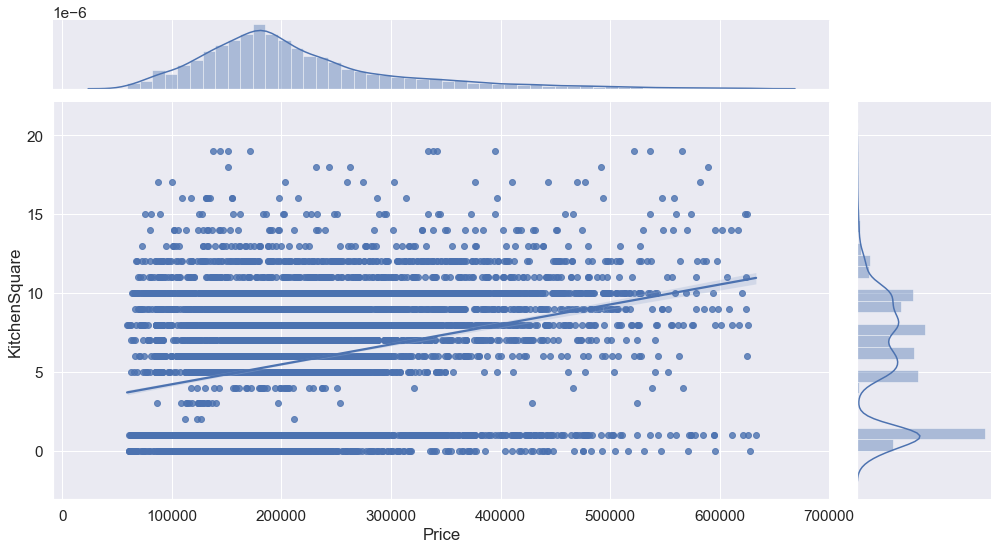

In [408]:
sns_x_y(df['Price'], df['KitchenSquare'])

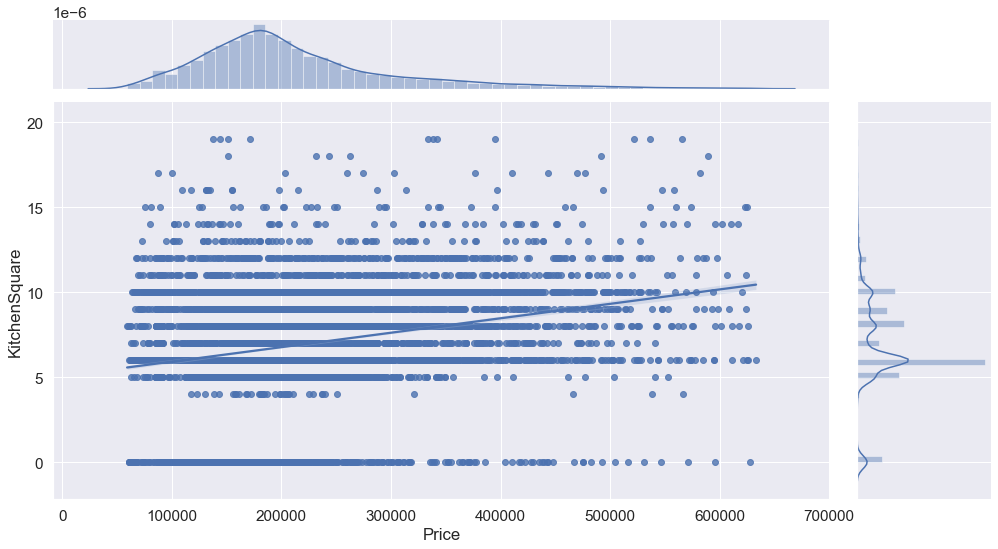

In [409]:
df.loc[df['KitchenSquare'] == 1, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['KitchenSquare'] == 2, 'KitchenSquare'] = df['KitchenSquare'].median()
df.loc[df['KitchenSquare'] == 3, 'KitchenSquare'] = df['KitchenSquare'].median()
sns_x_y(df['Price'], df['KitchenSquare'])

In [410]:
df[df['Square'] < df['LifeSquare'] + df['KitchenSquare']]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
14    10953          27    1.0   53.78125    52.40625            6.0      5   
28     8054          23    1.0   42.53125    43.96875            6.0      3   
48     7596          23    1.0   47.09375    46.81250           12.0      3   
76    14020          34    1.0   47.90625    42.78125            6.0      2   
100   14756           1    1.0   50.62500    46.50000            6.0     10   
...     ...         ...    ...        ...         ...            ...    ...   
9057  14564          34    4.0   97.50000    97.06250            6.0     20   
9918  14904          34    4.0  104.06250    99.81250           10.0      8   
1982   5548          86    5.0   52.50000    80.50000            6.0     12   
3271   6358          27    5.0   42.00000    80.31250            0.0      5   
4431   7594          53    5.0   39.90625    80.12500            6.0      5   

      HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
14           4.0       1977   0.072144  ...         B        2       629   
28           9.0       2014   0.034668  ...         B        0       168   
48           9.0       1977   0.014076  ...         B        2       475   
76           1.0       2016   0.069763  ...         B       53     13670   
100         24.0       1977   0.007122  ...         B        1       264   
...          ...        ...        ...  ...       ...      ...       ...   
9057         0.0       2016   0.069763  ...         B       53     13670   
9918        25.0       2018   0.069763  ...         B       53     13670   
1982        37.0       2011   0.161987  ...         A       31      7010   
3271        12.0       1977   0.011658  ...         B        4       915   
4431         1.0       1977   0.049652  ...         B       34      7759   

      Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
14           1           NaN            0        0        A  140647.562500   
28           0           NaN            0        0        B   95338.195312   
48           0           NaN            0        0        B   96029.164062   
76           4           NaN            1       11        B  181167.640625   
100          0           NaN            0        1        B  175188.953125   
...        ...           ...          ...      ...      ...            ...   
9057         4           NaN            1       11        B  401035.031250   
9918         4           NaN            1       11        B  411971.093750   
1982         5        4508.0            3        7        B  455264.875000   
3271         0           NaN            0        0        B  112693.640625   
4431         0         229.0            1        3        B  206148.843750   

      HouseAge  
14          43  
28           6  
48          43  
76           4  
100         43  
...        ...  
9057         4  
9918         2  
1982         9  
3271        43  
4431        43  

[1100 rows x 21 columns]

In [411]:
df.loc[df['Square'] < df['LifeSquare'] + df['KitchenSquare'], 'Square'] = df['LifeSquare'] + df['KitchenSquare']

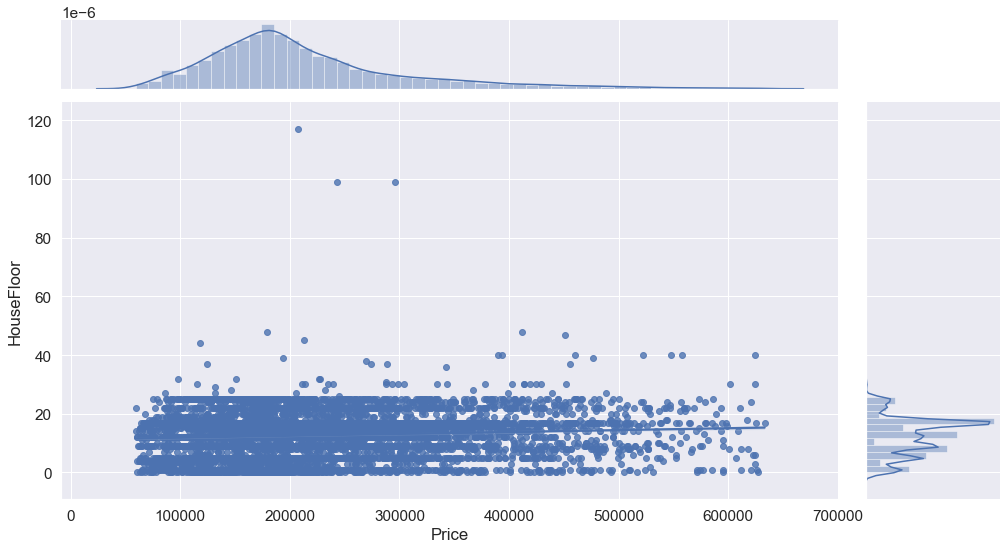

In [412]:
sns_x_y(df['Price'], df['HouseFloor'])

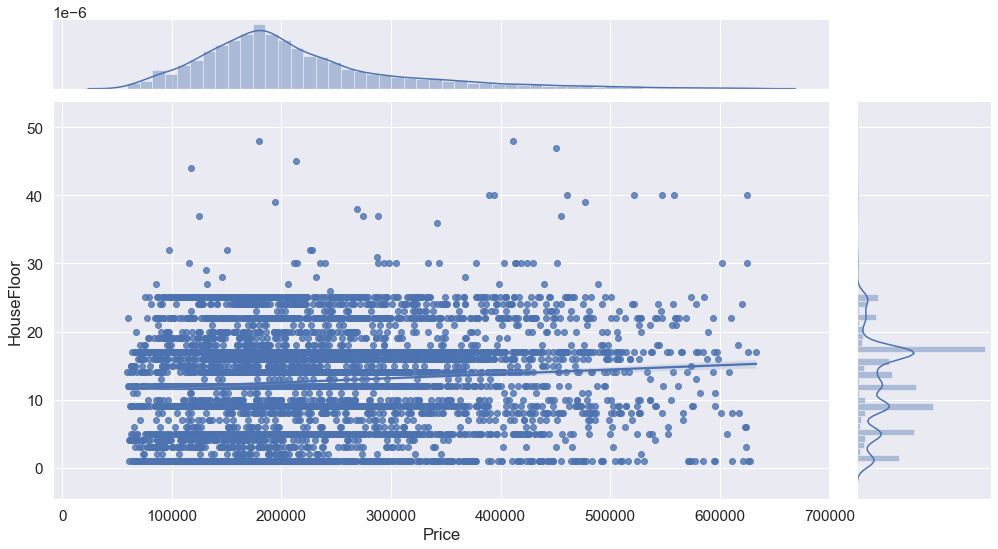

In [413]:
df.loc[df['HouseFloor'] > 50, 'HouseFloor'] = df['HouseFloor'].median()
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = 1
sns_x_y(df['Price'], df['HouseFloor'])

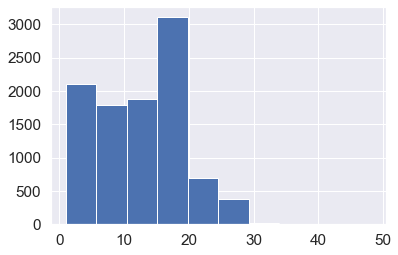

In [414]:
df['HouseFloor'].hist(bins=10)

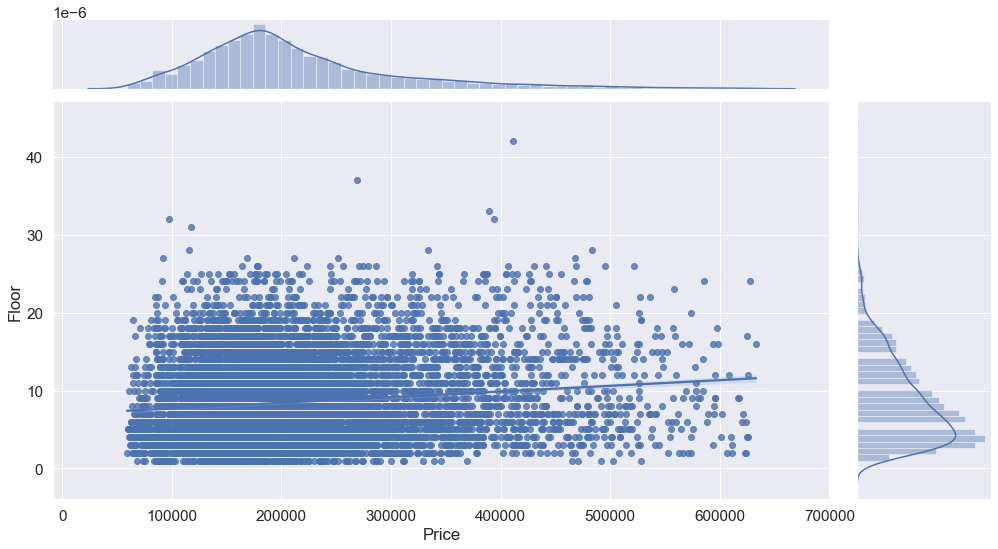

In [415]:
sns_x_y(df['Price'], df['Floor'])

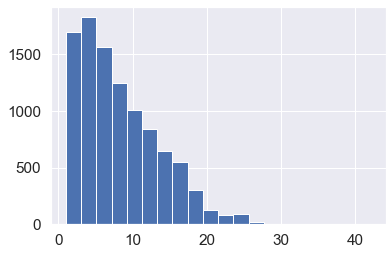

In [416]:
df['Floor'].hist(bins=20)

In [417]:
df.describe()

Id    DistrictId         Rooms       Square    LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.00000  1.000000e+04   
mean    8383.40770     50.400800      1.888400          inf           inf   
std     4859.01902     43.587592      0.811056     19.09375  1.511719e+01   
min        0.00000      0.000000      1.000000     20.21875  1.064844e+01   
25%     4169.50000     20.000000      1.000000     42.34375  2.223047e+01   
50%     8394.50000     36.000000      2.000000     53.12500  3.256250e+01   
75%    12592.50000     75.000000      2.000000     66.68750  4.453125e+01   
max    16798.00000    209.000000      5.000000    212.87500  1.388750e+02   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   1.000000e+04  10000.000000  1.000000e+04  1.000000e+04  10000.000000   
mean             inf      8.526700           inf  3.990166e+03      0.118896   
std     2.804688e+00      5.241148  6.535156e+00  2.005003e+05      0.119019   
min     0.000000e+00      1.000000  1.000000e+00  1.910000e+03      0.000000   
25%     6.000000e+00      4.000000  9.000000e+00  1.974000e+03      0.017654   
50%     6.000000e+00      7.000000  1.300000e+01  1.977000e+03      0.075439   
75%     9.000000e+00     12.000000  1.700000e+01  2.001000e+03      0.195801   
max     1.900000e+01     42.000000  4.800000e+01  2.005201e+07      0.521973   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000        5202.0  10000.000000   
mean      24.687000   5352.157400      8.039200           inf      1.319500   
std       17.532614   4006.799803     23.831875           inf      1.493601   
min        0.000000    168.000000      0.000000           0.0      0.000000   
25%        6.000000   1564.000000      0.000000         350.0      0.000000   
50%       25.000000   5285.000000      2.000000         900.0      1.000000   
75%       36.000000   7227.000000      5.000000        1548.0      2.000000   
max       74.000000  19083.000000    141.000000        4848.0      6.000000   

            Shops_1          Price      HouseAge  
count  10000.000000   10000.000000  10000.000000  
mean       4.231300  214139.031250     35.127600  
std        4.806341   92872.203125     18.416347  
min        0.000000   59174.777344      0.000000  
25%        1.000000  153872.628906     19.000000  
50%        3.000000  192269.648438     43.000000  
75%        6.000000  249135.460938     46.000000  
max       23.000000  633233.437500    110.000000

In [418]:
df[df['HouseFloor'] < df['Floor']]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
14    10953          27    1.0   58.40625   52.406250            6.0      5   
51    10103          94    1.0   35.28125   23.359375            6.0     11   
65    11398          62    1.0   41.18750   21.656250            0.0      6   
68     1063          77    1.0   42.68750   23.921875            8.0     14   
72    14675          74    1.0   52.46875   52.437500            0.0     18   
...     ...         ...    ...        ...         ...            ...    ...   
3268   8901          34    5.0  121.56250  114.937500            6.0     25   
4431   7594          53    5.0   86.12500   80.125000            6.0      5   
4762   4070          21    5.0  114.31250   88.500000            9.0      6   
6988   8685          62    5.0  124.93750   81.125000            6.0      5   
9432    338          46    5.0  147.75000   80.312500            0.0      6   

      HouseFloor  HouseYear  Ecology_1  ... Ecology_3 Social_1  Social_2  \
14           4.0       1977   0.072144  ...         B        2       629   
51           9.0       1971   0.282715  ...         B       33      8667   
65           1.0       1977   0.072144  ...         B        2       629   
68          12.0       1983   0.000070  ...         B       46     10309   
72          17.0       1977   0.075806  ...         B        6      1437   
...          ...        ...        ...  ...       ...      ...       ...   
3268         1.0       1977   0.069763  ...         B       53     13670   
4431         1.0       1977   0.049652  ...         B       34      7759   
4762         5.0       1960   0.034332  ...         B       25      5487   
6988         3.0       2017   0.072144  ...         B        2       629   
9432         1.0       1977   0.150757  ...         B       16      3433   

      Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2          Price  \
14           1           NaN            0        0        A  140647.562500   
51           2           NaN            0        6        B  148862.203125   
65           1           NaN            0        0        A  114063.093750   
68           1         240.0            1       16        B  179784.468750   
72           3           NaN            0        2        B  160292.156250   
...        ...           ...          ...      ...      ...            ...   
3268         4           NaN            1       11        B  455446.406250   
4431         0         229.0            1        3        B  206148.843750   
4762         3           NaN            0        4        B  499830.937500   
6988         1           NaN            0        0        A  271919.875000   
9432         4        2644.0            4        5        B  352168.968750   

      HouseAge  
14          43  
51          49  
65          43  
68          37  
72          43  
...        ...  
3268        43  
4431        43  
4762        60  
6988         3  
9432        43  

[1818 rows x 21 columns]

In [419]:
df.loc[df['HouseFloor'] < df['Floor'], 'Floor'] = df['HouseFloor']
df[df['HouseFloor'] < df['Floor']]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Healthcare_1, Helthcare_2, Shops_1, Shops_2, Price, HouseAge]
Index: []

[0 rows x 21 columns]

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 9699
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float64 
 3   Square         10000 non-null  float16 
 4   LifeSquare     10000 non-null  float16 
 5   KitchenSquare  10000 non-null  float16 
 6   Floor          10000 non-null  float16 
 7   HouseFloor     10000 non-null  float16 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float16 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float16 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

### Не будем использовать фичу Healthcare_1 из-за кол-ва пропусков равного почти половине всей выборки

In [421]:
# Избавимся от Healthcare_1 и HouseYear
df_cut = df.drop(['Healthcare_1', 'HouseYear'], axis=1)
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 9699
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float64 
 3   Square         10000 non-null  float16 
 4   LifeSquare     10000 non-null  float16 
 5   KitchenSquare  10000 non-null  float16 
 6   Floor          10000 non-null  float16 
 7   HouseFloor     10000 non-null  float16 
 8   Ecology_1      10000 non-null  float16 
 9   Ecology_2      10000 non-null  category
 10  Ecology_3      10000 non-null  category
 11  Social_1       10000 non-null  int8    
 12  Social_2       10000 non-null  int16   
 13  Social_3       10000 non-null  int16   
 14  Helthcare_2    10000 non-null  int8    
 15  Shops_1        10000 non-null  int8    
 16  Shops_2        10000 non-null  category
 17  Price          10000 non-null  f

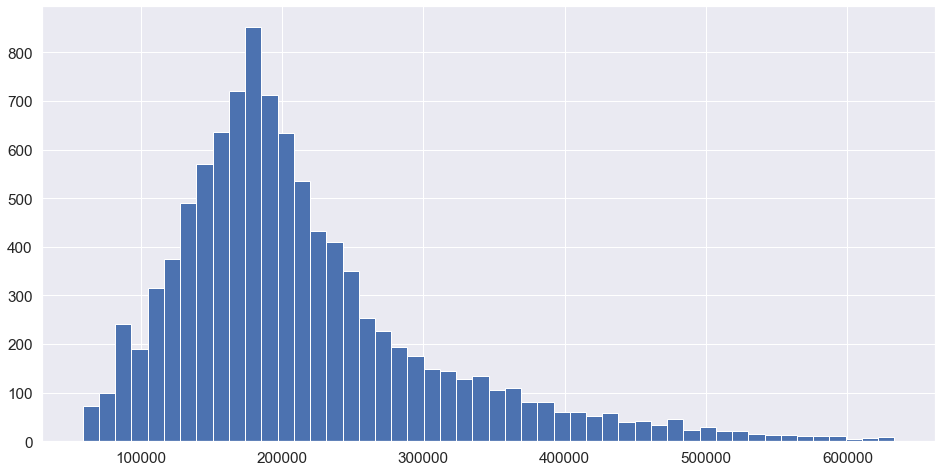

In [422]:
df_cut.Price.hist(bins=50, figsize= (16, 8))

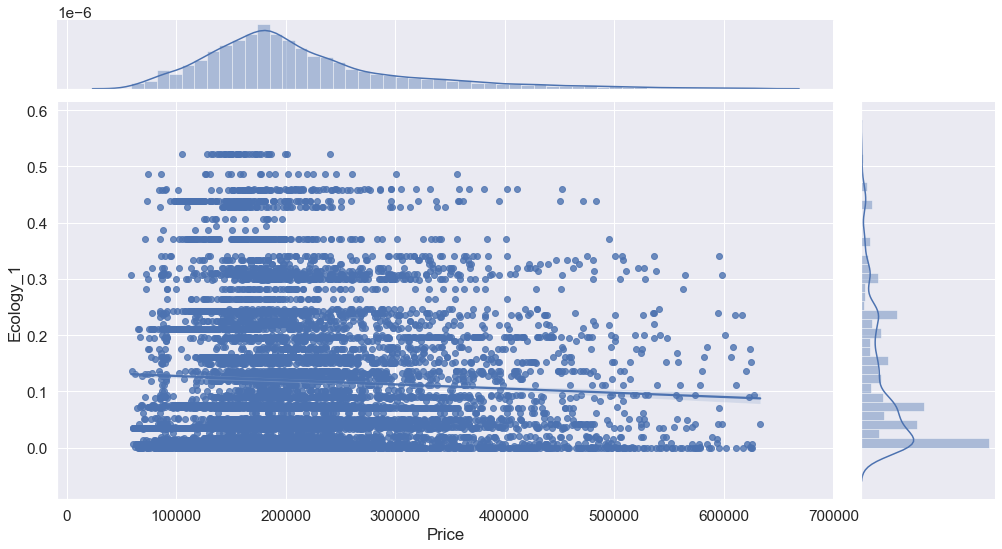

In [423]:
sns_x_y(df_cut['Price'], df_cut['Ecology_1'])

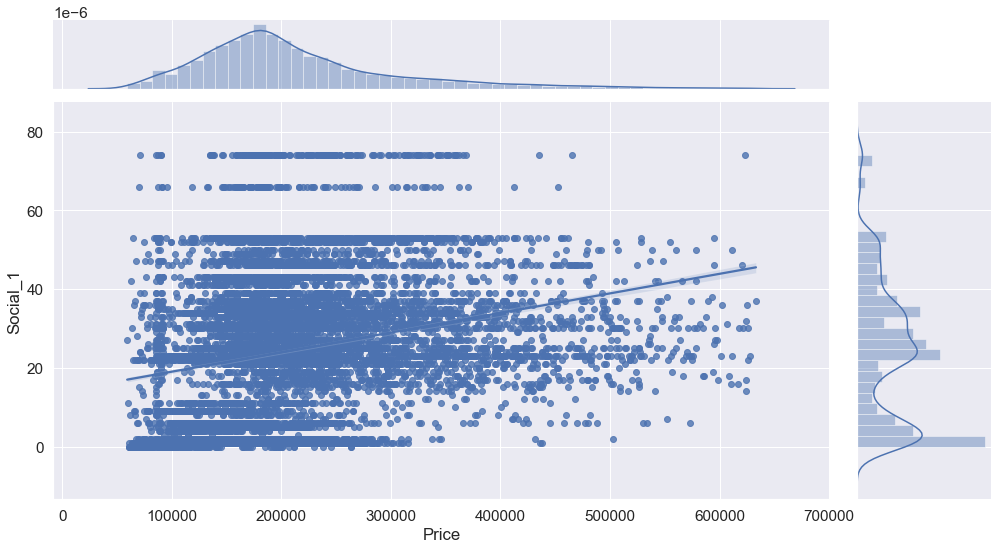

In [424]:
sns_x_y(df_cut['Price'], df_cut['Social_1'])

In [425]:
df_cut['Social_1'].median()

25.0

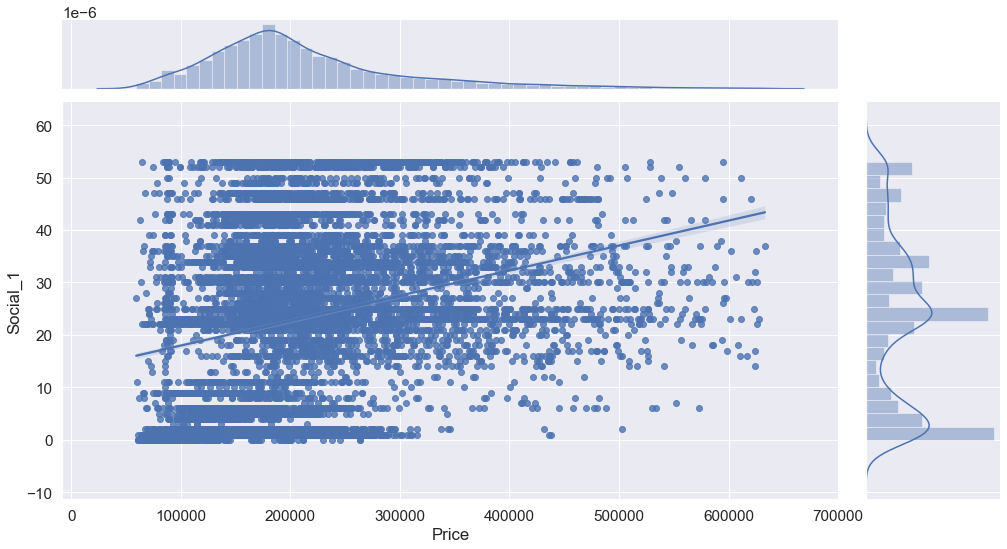

In [426]:
df_cut.loc[df_cut['Social_1'] > 60, 'Social_1'] = df_cut['Social_1'].median()
sns_x_y(df_cut['Price'], df_cut['Social_1'])

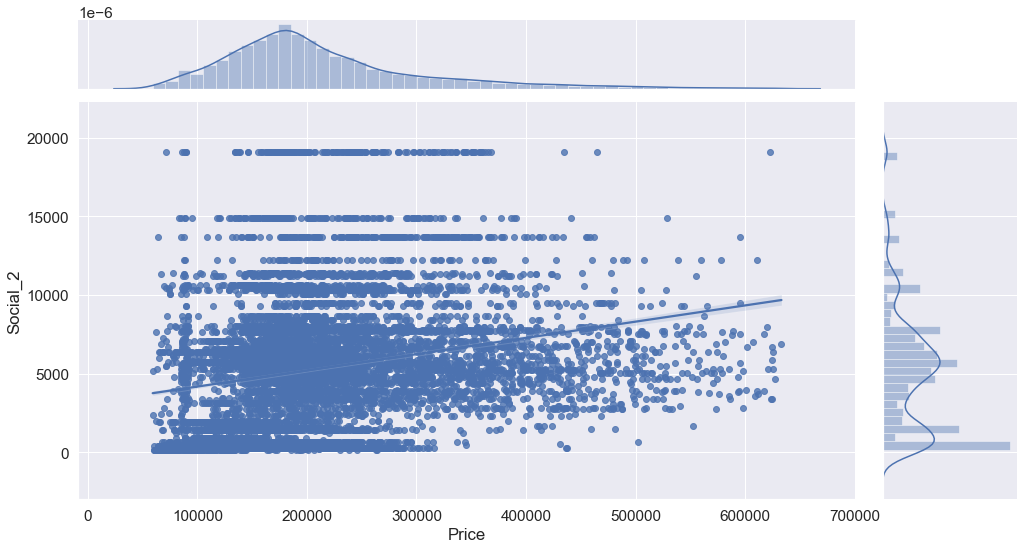

In [427]:
sns_x_y(df_cut['Price'], df_cut['Social_2'])

In [428]:
df_cut['Social_2'].median()

5285.0

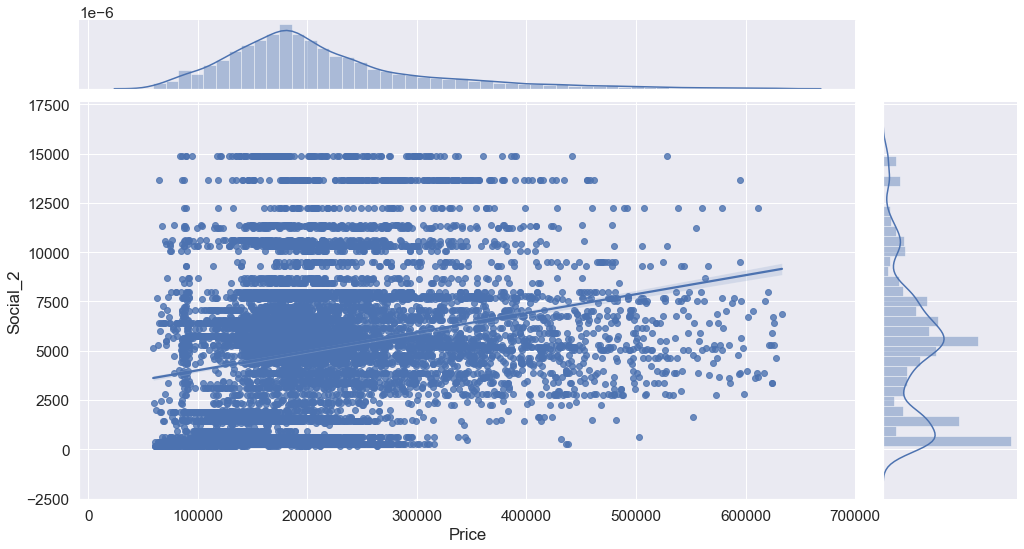

In [429]:
df_cut.loc[df_cut['Social_2'] > 16000, 'Social_2'] = df_cut['Social_2'].median()
sns_x_y(df_cut['Price'], df_cut['Social_2'])

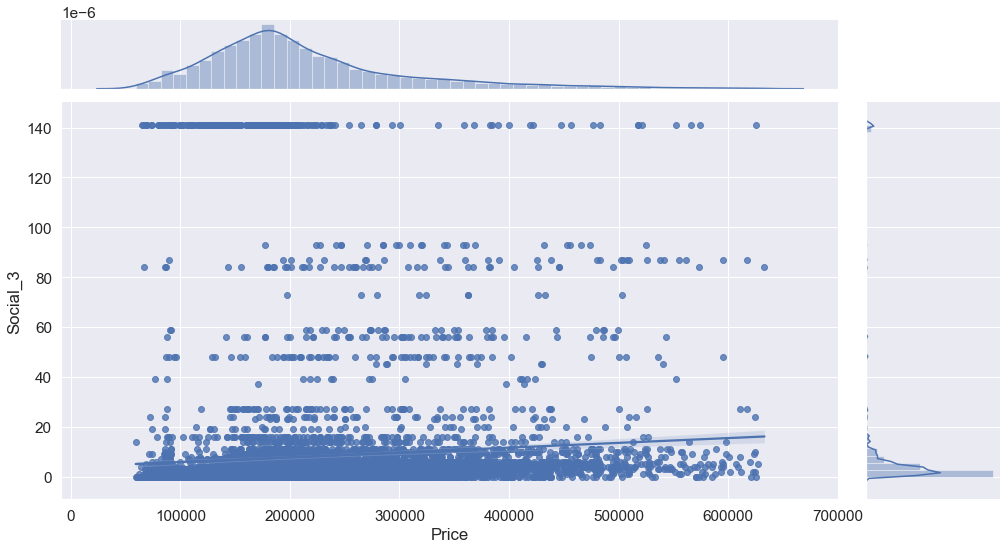

In [430]:
sns_x_y(df_cut['Price'], df_cut['Social_3'])

### Не будем использовать фичу Social_3

In [431]:
df_cut = df_cut.drop(['Social_3'], axis=1)

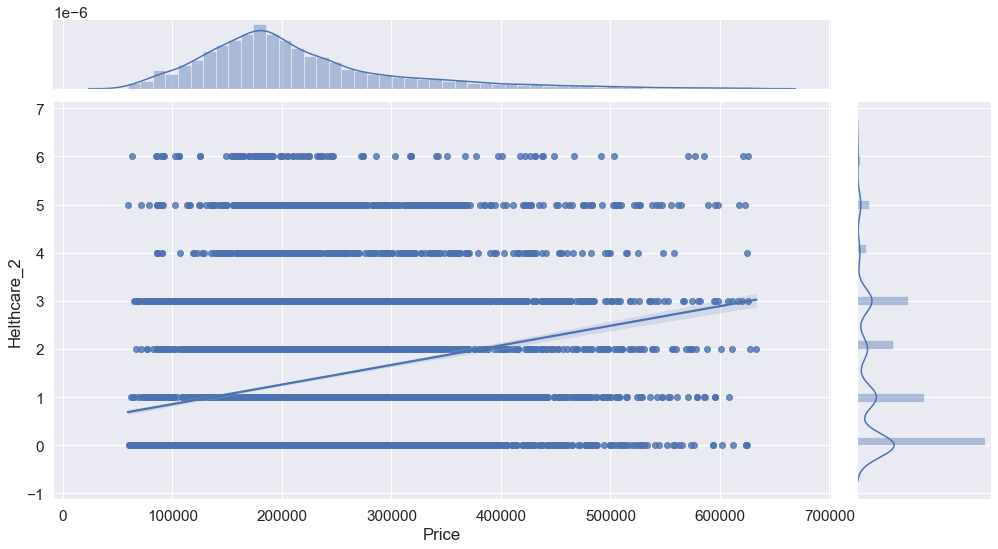

In [432]:
sns_x_y(df_cut['Price'], df_cut['Helthcare_2'])

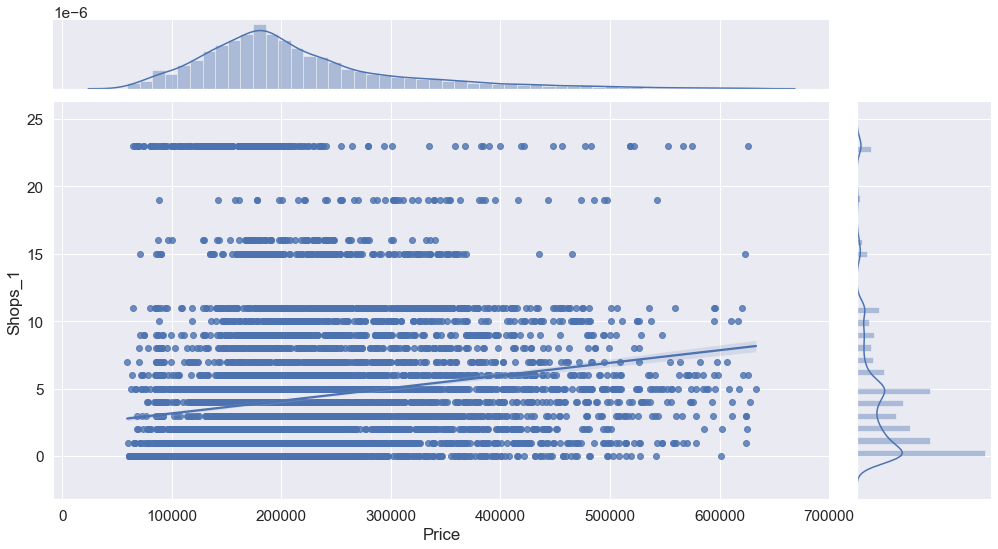

In [433]:
sns_x_y(df_cut['Price'], df_cut['Shops_1'])

In [434]:
def unique_counts_print(df):
    print('Counts of all Dataframe uniques:')
    for col in df.columns:
        print(f'\t{col}: {df[col].unique().shape[0]}')

In [435]:
unique_counts_print(df_cut)

Counts of all Dataframe uniques:
	Id: 10000
	DistrictId: 205
	Rooms: 5
	Square: 1901
	LifeSquare: 2218
	KitchenSquare: 17
	Floor: 32
	HouseFloor: 41
	Ecology_1: 128
	Ecology_2: 2
	Ecology_3: 2
	Social_1: 49
	Social_2: 141
	Helthcare_2: 7
	Shops_1: 16
	Shops_2: 2
	Price: 9996
	HouseAge: 95


### Из метода info() и функции подсчёта уникальных значений каждой фичи unique_counts_print(), 
### видно что фичи Ecology_2, Ecology_3, Shops_2 следует преобразовать методом getdummies 

In [436]:
df_cut.Ecology_2.unique(), df_cut.Ecology_3.unique(), df_cut.Shops_2.unique() 

([B, A]
 Categories (2, object): [B, A],
 [B, A]
 Categories (2, object): [B, A],
 [B, A]
 Categories (2, object): [B, A])

In [437]:
pd.get_dummies(df_cut[['Ecology_2', 'Ecology_3', 'Shops_2']]).head()

Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B
4             0            1            0            1          0          1
9             0            1            0            1          0          1
14            0            1            0            1          1          0
18            0            1            0            1          1          0
22            0            1            0            1          0          1

In [438]:
df_cut = pd.concat([df_cut, pd.get_dummies(df_cut[['Ecology_2', 'Ecology_3', 'Shops_2']])], axis=1)
df_cut.head()

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
4   10783          99    1.0  39.65625   23.781250            7.0   11.0   
9    8649          23    1.0  46.46875   18.921875            8.0   13.0   
14  10953          27    1.0  58.40625   52.406250            6.0    4.0   
18   2829          57    1.0  44.50000   23.109375            8.0    6.0   
22  11852          48    1.0  41.65625   20.203125           10.0   19.0   

    HouseFloor  Ecology_1 Ecology_2  ... Shops_1  Shops_2          Price  \
4         12.0   0.012337         B  ...       4        B  150226.531250   
9         17.0   0.075806         B  ...       2        B   95380.218750   
14         4.0   0.072144         B  ...       0        A  140647.562500   
18        12.0   0.133179         B  ...       4        A  183743.234375   
22        22.0   0.041138         B  ...      10        B  215083.968750   

    HouseAge  Ecology_2_A Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_2_A  \
4         44            0           1            0            1          0   
9          6            0           1            0            1          0   
14        43            0           1            0            1          1   
18        37            0           1            0            1          1   
22        24            0           1            0            1          0   

    Shops_2_B  
4           1  
9           1  
14          0  
18          0  
22          1  

[5 rows x 24 columns]

In [439]:
df_cut = df_cut.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)
df_cut.head()

Id  DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
4   10783          99    1.0  39.65625   23.781250            7.0   11.0   
9    8649          23    1.0  46.46875   18.921875            8.0   13.0   
14  10953          27    1.0  58.40625   52.406250            6.0    4.0   
18   2829          57    1.0  44.50000   23.109375            8.0    6.0   
22  11852          48    1.0  41.65625   20.203125           10.0   19.0   

    HouseFloor  Ecology_1  Social_1  ...  Helthcare_2  Shops_1          Price  \
4         12.0   0.012337      35.0  ...            2        4  150226.531250   
9         17.0   0.075806       6.0  ...            0        2   95380.218750   
14         4.0   0.072144       2.0  ...            0        0  140647.562500   
18        12.0   0.133179      49.0  ...            3        4  183743.234375   
22        22.0   0.041138      46.0  ...            1       10  215083.968750   

    HouseAge  Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_2_A  \
4         44            0            1            0            1          0   
9          6            0            1            0            1          0   
14        43            0            1            0            1          1   
18        37            0            1            0            1          1   
22        24            0            1            0            1          0   

    Shops_2_B  
4           1  
9           1  
14          0  
18          0  
22          1  

[5 rows x 21 columns]

## Оценим дома по их количеству на район. 
#### Создадим датафреймы с районами и ценами где домов много (более или равно 100 на район), а потом где домов мало (менее 100 на район) и посмотрим зависимость от цены двух разных датафреймов

In [440]:
df_append = pd.DataFrame()
df_DistrId = df_cut[['DistrictId', 'Price']]

for id in df_DistrId.DistrictId.unique():
    if df_DistrId[df_DistrId.DistrictId == id].size / 2 >= 100:
        # print(f'DistrictId: {id}, houses_quantity: {df_DistrId[df_DistrId.DistrictId == id].size / 2}')
        df_append = df_append.append(df_DistrId[df_DistrId.DistrictId == id])


In [441]:
df_append.shape

(5069, 2)

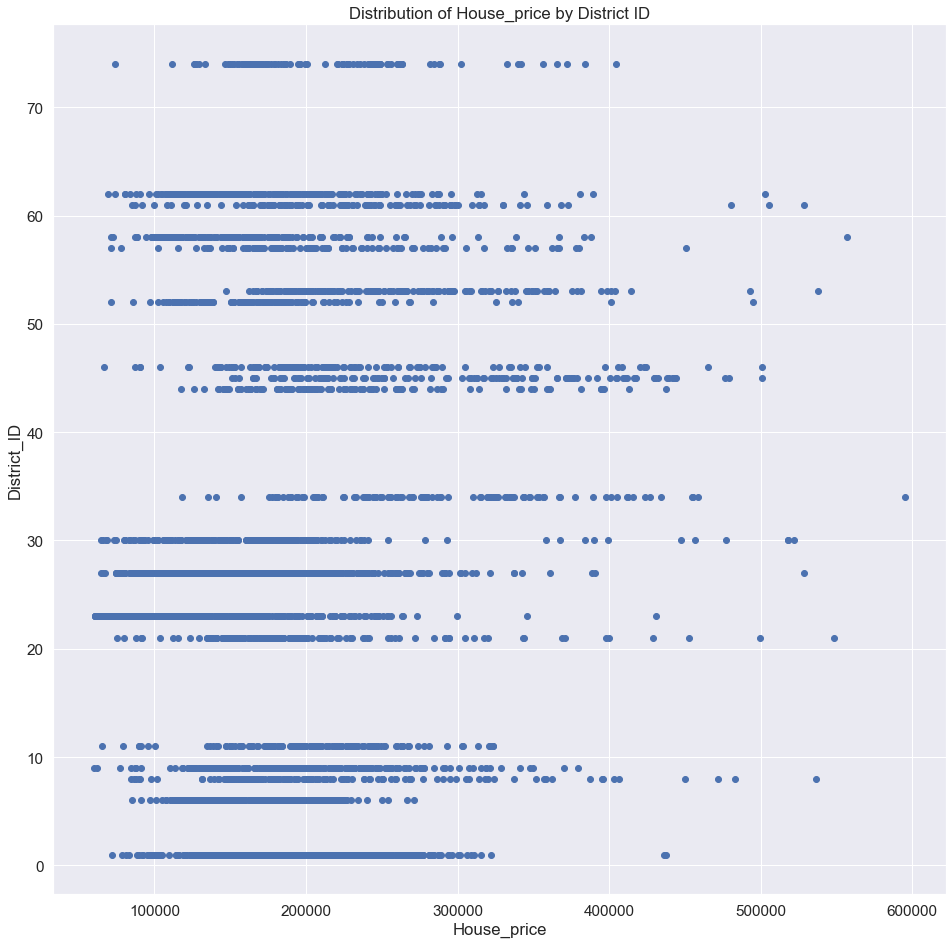

In [442]:
plt.figure(figsize=(16, 16))

plt.scatter(df_append['Price'], df_append['DistrictId'])

plt.xlabel('House_price')
plt.ylabel('District_ID')
plt.title('Distribution of House_price by District ID')
plt.show()

In [443]:
df_append2 = pd.DataFrame()
df_DistrId = df_cut[['DistrictId', 'Price']]

for id in df_DistrId.DistrictId.unique():
    if df_DistrId[df_DistrId.DistrictId == id].size / 2 < 100:
        # print(f'DistrictId: {id}, houses_quantity: {df_DistrId[df_DistrId.DistrictId == id].size / 2}')
        df_append2 = df_append2.append(df_DistrId[df_DistrId.DistrictId == id])

In [444]:
df_append2.shape

(4931, 2)

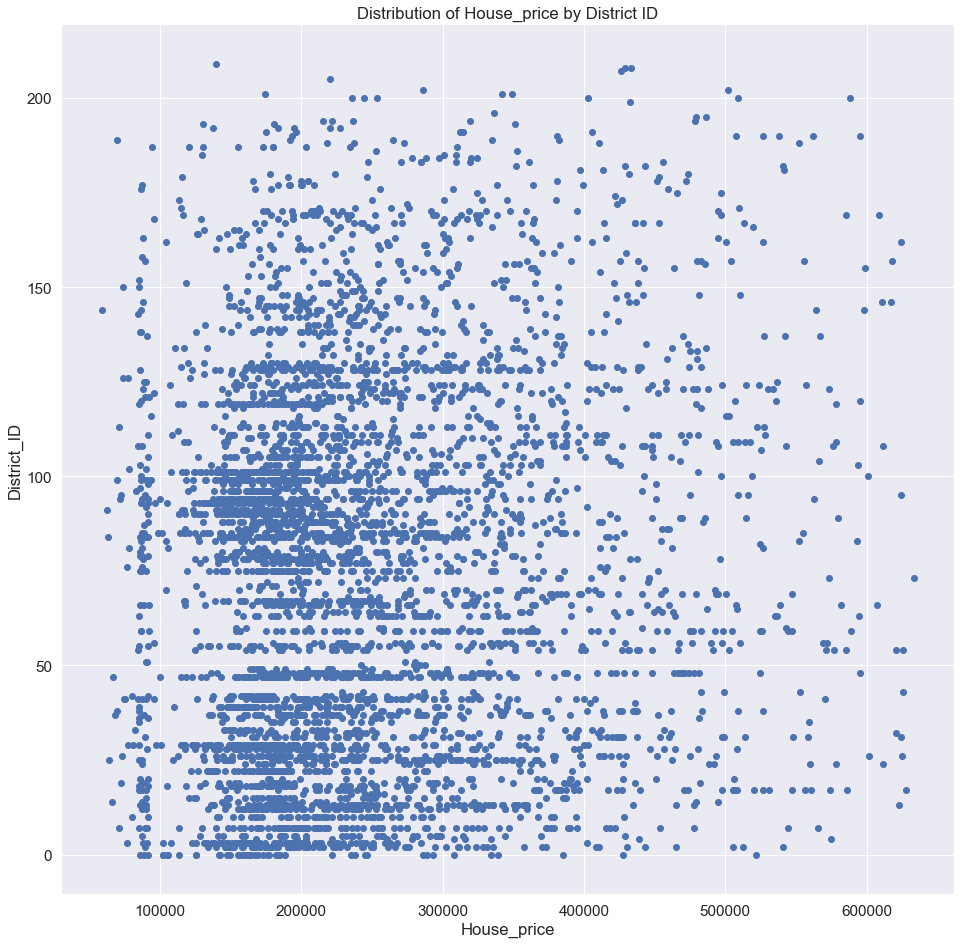

In [445]:
plt.figure(figsize=(16, 16))

plt.scatter(df_append2['Price'], df_append2['DistrictId'])

plt.xlabel('House_price')
plt.ylabel('District_ID')
plt.title('Distribution of House_price by District ID')
plt.show()

#### В целом очень слабая связь. Всё же пока оставим фичу DistrictId.

### Оценим связь между колонками KitchenSquare, Square, LifeSquare

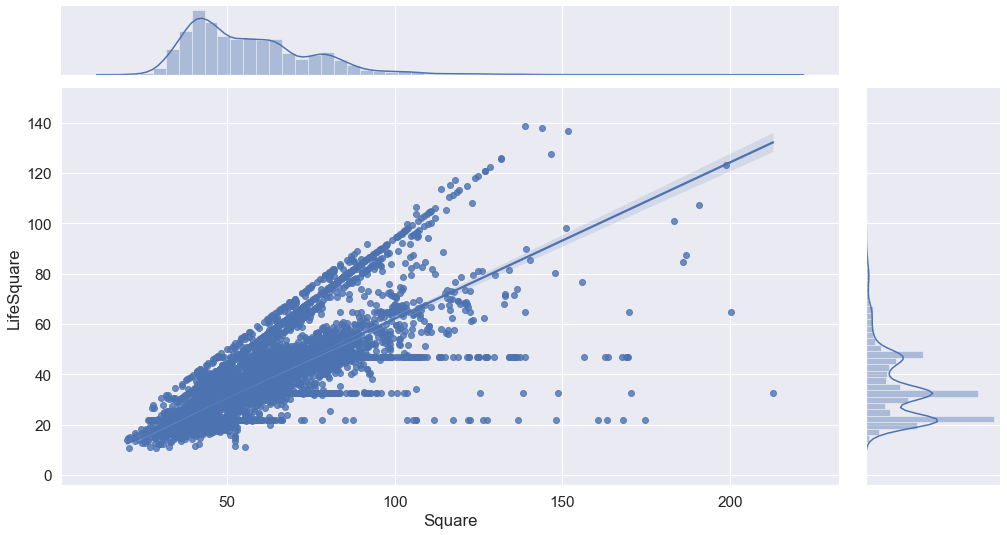

In [446]:
sns_x_y(df_cut['Square'], df_cut['LifeSquare'])

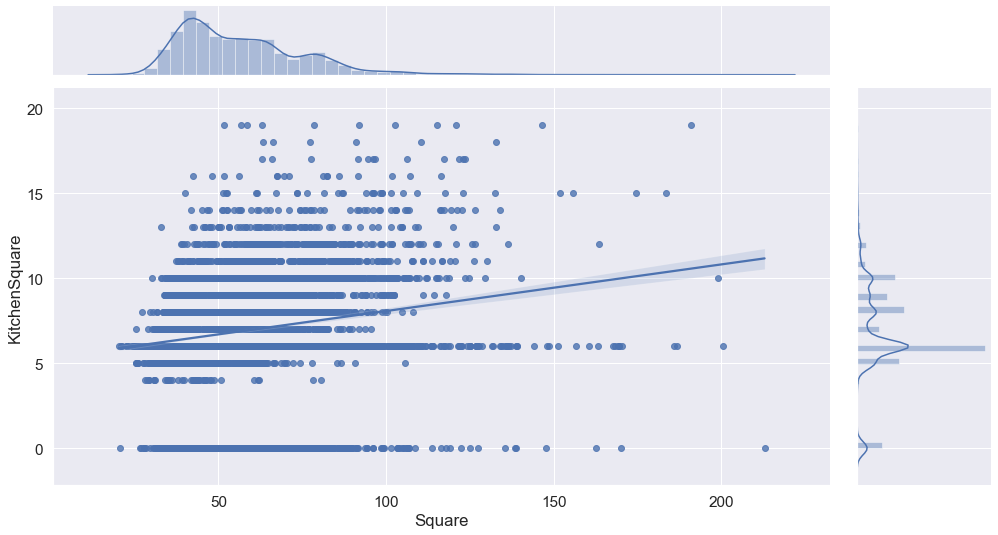

In [447]:
sns_x_y(df_cut['Square'], df_cut['KitchenSquare'])

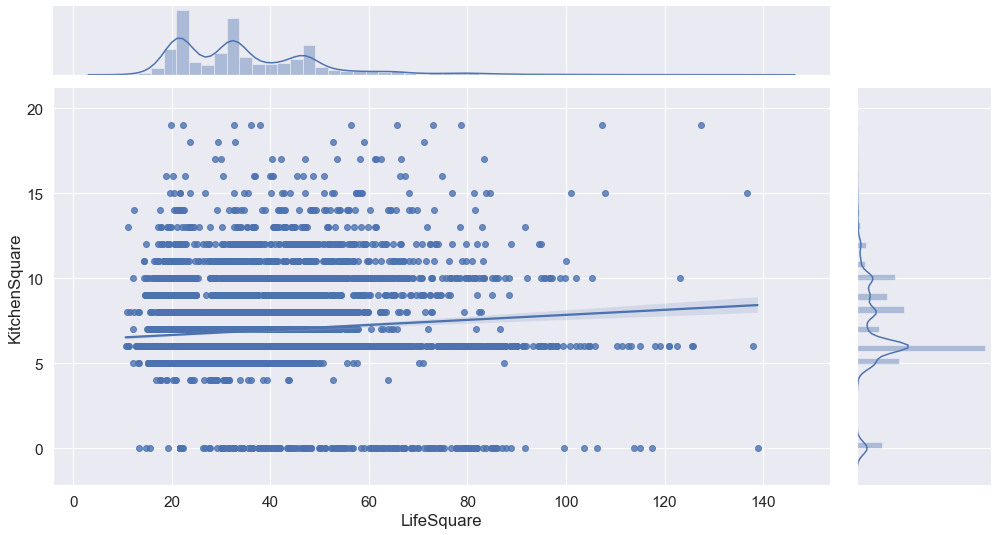

In [448]:
sns_x_y(df_cut['LifeSquare'], df_cut['KitchenSquare'])

#### В целом связь наблюдается

### Матрица корреляции

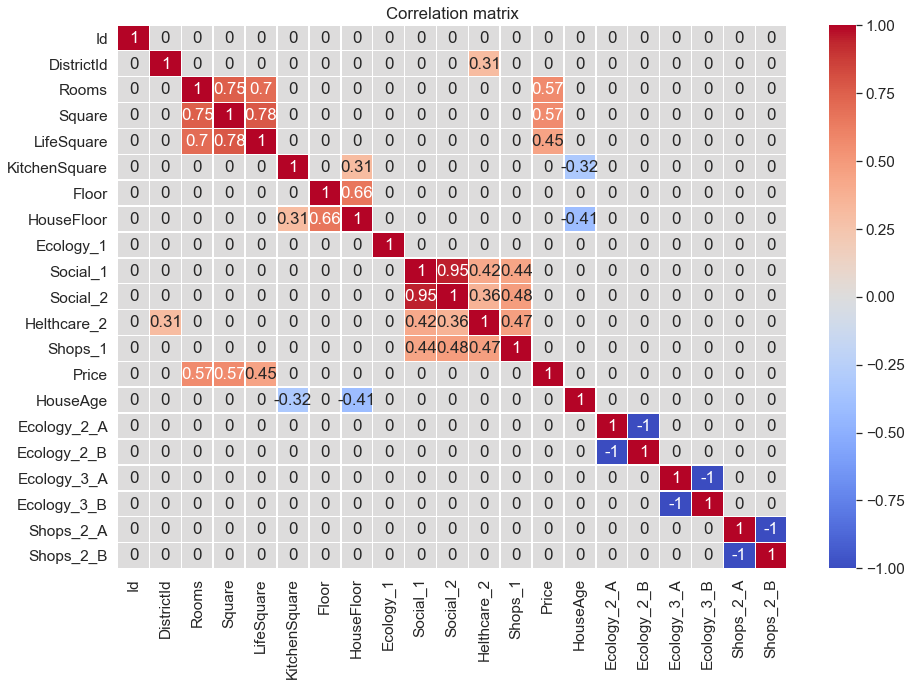

In [449]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_cut.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

#### Значимая корреляция с колонкой Price наблюдается в колонках Rooms, Square, LifeSquare

## Создание класса по итогу обработки данных

In [450]:
class DataPipeline:
    """Подготовка исходных данных"""

    def transform_Rooms(self, df):
        """Корректировка кол-ва комнат"""
        df.loc[df['Rooms'] > 5, 'Rooms'] = df['Rooms'].median()
        df.loc[df['Rooms'] == 0, 'Rooms'] = df['Rooms'].median()
        return df

    def transform_lifeSquare(self, df):
        """Корректировка жилой площади
        в зависимости от кол-ва комнат"""
        df_1room = df[df['Rooms'] == 1]
        df_2room = df[df['Rooms'] == 2]
        df_3room = df[df['Rooms'] == 3]
        df_4room = df[df['Rooms'] == 4]
        df_5room = df[df['Rooms'] == 5]

        df_1room.loc[df_1room['LifeSquare'] >= 100, 'LifeSquare'] = df_1room.LifeSquare.median()
        df_1room.loc[df_1room['LifeSquare'] < 10, 'LifeSquare'] = df_1room.LifeSquare.median()
        df_2room.loc[df_2room['LifeSquare'] >= 100, 'LifeSquare'] = df_2room.LifeSquare.median()
        df_2room.loc[df_2room['LifeSquare'] < 20, 'LifeSquare'] = df_2room.LifeSquare.median()
        df_3room.loc[df_3room['LifeSquare'] >= 140, 'LifeSquare'] = df_3room.LifeSquare.median()
        df_3room.loc[df_3room['LifeSquare'] < 30, 'LifeSquare'] = df_3room.LifeSquare.median()
        df_4room.loc[df_4room['LifeSquare'] > 150, 'LifeSquare'] = df_4room.LifeSquare.median()
        df_4room.loc[df_4room['LifeSquare'] < 35, 'LifeSquare'] = df_4room.LifeSquare.median()
        df_5room.loc[df_5room['LifeSquare'] > 200, 'LifeSquare'] = df_5room.LifeSquare.median()
        df_5room.loc[df_5room['LifeSquare'] < 50, 'LifeSquare'] = df_5room.LifeSquare.median()

        df_1room.LifeSquare = df_1room.LifeSquare.fillna(df_1room.LifeSquare.median())
        df_2room.LifeSquare = df_2room.LifeSquare.fillna(df_2room.LifeSquare.median())
        df_3room.LifeSquare = df_3room.LifeSquare.fillna(df_3room.LifeSquare.median())
        df_4room.LifeSquare = df_4room.LifeSquare.fillna(df_4room.LifeSquare.median())
        df_5room.LifeSquare = df_5room.LifeSquare.fillna(df_5room.LifeSquare.median())

        df = pd.concat([df_1room, df_2room, df_3room, df_4room, df_5room])
        return df

    def transform_KitchenSquare(self, df):
        """Корректировка кухонной площади"""
        df.loc[df['KitchenSquare'] >= 20, 'KitchenSquare'] = df['KitchenSquare'].median()
        df.loc[df['KitchenSquare'] <= 3, 'KitchenSquare'] = df['KitchenSquare'].median()
        return df

    def transform_Square(self, df):
        """Корректировка общей площади"""
        df.loc[df['Square'] > 250, 'Square'] = df['Square'].median()
        df.loc[df['Square'] < 20, 'Square'] = df['Square'].median()
        df.loc[df['Square'] < df['LifeSquare'] + df['KitchenSquare'], 'Square'] = df['LifeSquare'] + df['KitchenSquare']
        return df

    def transform_HouseFloor(self, df):
        """Корректировка этажности дома"""
        df.loc[df['HouseFloor'] > 50, 'HouseFloor'] = df['HouseFloor'].median()
        df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = 1
        return df

    def transform_Floor(self, df):
        """Корректировка этажа квартиры"""
        df.loc[df['HouseFloor'] < df['Floor'], 'Floor'] = df['HouseFloor']
        df.loc[df['Floor'] == 0, 'Floor'] = 1
        return df

    def transform_all(self, df):
        """Корректировка всех данных"""

        # выбросы
        df = self.transform_Rooms(df)
        df = self.transform_lifeSquare(df)
        df = self.transform_KitchenSquare(df)
        df = self.transform_Square(df)
        df = self.transform_HouseFloor(df)
        df = self.transform_Floor(df)

        # Новая фича
        df['HouseAge'] = datetime.datetime.now().year - df['HouseYear']

        # Некорректные значения
        df.loc[df['HouseAge'] < 0, 'HouseAge'] = 0

        # обработка категорий
        df = pd.concat([df, pd.get_dummies(df[['Ecology_2', 'Ecology_3', 'Shops_2']])], axis=1)

        # Выбросим ненужные фичи
        df = df.drop(['Id', 'HouseYear', 'Healthcare_1', 'Social_3', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis=1)

        return df

In [451]:
df_for_test = pd.read_csv('test.csv', delimiter=',')
df_for_test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

In [452]:
pipe = DataPipeline()
df_for_test = pipe.transform_all(df_for_test)
df_for_test.head()

DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
2          190    1.0  52.921340   15.948246           12.0    2.0   
4           27    1.0  49.387569   43.387569            6.0   17.0   
5           53    1.0  40.675627   21.801044            6.0   21.0   
12           3    1.0  34.743457   19.772110            6.0    5.0   
14          27    1.0  37.555197   21.801044            6.0    1.0   

    HouseFloor  Ecology_1  Social_1  Social_2  Helthcare_2  Shops_1  HouseAge  \
2          5.0   0.000000        30      7538            5        5       111   
4         17.0   0.072158         2       629            0        0         3   
5         21.0   0.049637        34      7759            1        3        43   
12         9.0   0.265089        37      5288            3        2        49   
14         1.0   0.211401         9      1892            0        1        43   

    Ecology_2_A  Ecology_2_B  Ecology_3_A  Ecology_3_B  Shops_2_A  Shops_2_B  
2             0            1            0            1          0          1  
4             0            1            0            1          1          0  
5             0            1            0            1          0          1  
12            0            1            0            1          0          1  
14            0            1            0            1          0          1

In [453]:
df_for_test = reduce_mem_usage(df_for_test)
df_for_test.info()

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.36 MB
Decreased by 50.4%
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2 to 3912
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int16  
 1   Rooms          5000 non-null   float16
 2   Square         5000 non-null   float16
 3   LifeSquare     5000 non-null   float16
 4   KitchenSquare  5000 non-null   float16
 5   Floor          5000 non-null   float16
 6   HouseFloor     5000 non-null   float16
 7   Ecology_1      5000 non-null   float16
 8   Social_1       5000 non-null   int8   
 9   Social_2       5000 non-null   int16  
 10  Helthcare_2    5000 non-null   int8   
 11  Shops_1        5000 non-null   int8   
 12  HouseAge       5000 non-null   int8   
 13  Ecology_2_A    5000 non-null   float16
 14  Ecology_2_B    5000 non-null   float16
 15  Ecology_3_A    5000 non-null   float16
 

In [454]:
df_cut = df_cut.drop(['Id'], axis=1)
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 9699
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int16  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float16
 3   LifeSquare     10000 non-null  float16
 4   KitchenSquare  10000 non-null  float16
 5   Floor          10000 non-null  float16
 6   HouseFloor     10000 non-null  float16
 7   Ecology_1      10000 non-null  float16
 8   Social_1       10000 non-null  float64
 9   Social_2       10000 non-null  float64
 10  Helthcare_2    10000 non-null  int8   
 11  Shops_1        10000 non-null  int8   
 12  Price          10000 non-null  float32
 13  HouseAge       10000 non-null  int32  
 14  Ecology_2_A    10000 non-null  uint8  
 15  Ecology_2_B    10000 non-null  uint8  
 16  Ecology_3_A    10000 non-null  uint8  
 17  Ecology_3_B    10000 non-null  uint8  
 18  Shops_2

## Приступаем к машинному обучению

In [455]:
df_features = df_cut.drop(['Price'], axis=1)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4 to 9699
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int16  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float16
 3   LifeSquare     10000 non-null  float16
 4   KitchenSquare  10000 non-null  float16
 5   Floor          10000 non-null  float16
 6   HouseFloor     10000 non-null  float16
 7   Ecology_1      10000 non-null  float16
 8   Social_1       10000 non-null  float64
 9   Social_2       10000 non-null  float64
 10  Helthcare_2    10000 non-null  int8   
 11  Shops_1        10000 non-null  int8   
 12  HouseAge       10000 non-null  int32  
 13  Ecology_2_A    10000 non-null  uint8  
 14  Ecology_2_B    10000 non-null  uint8  
 15  Ecology_3_A    10000 non-null  uint8  
 16  Ecology_3_B    10000 non-null  uint8  
 17  Shops_2_A      10000 non-null  uint8  
 18  Shops_2

### Применим стандатизацию

In [134]:
features_for_standart = df_features.select_dtypes(include=['float16', 'int32']).columns.tolist()
features_for_standart

['Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'HouseAge']

In [135]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df_features[features_for_standart])
stand_features

array([[-0.90432853, -0.76261003,  0.03768725, ..., -0.09317826,
        -0.89497918,  0.48179173],
       [-0.54745996, -1.08404491,  0.39423649, ...,  0.6722091 ,
        -0.36170882, -1.58169569],
       [ 0.07787854,  1.13085844, -0.31886198, ..., -1.31779803,
        -0.39247811,  0.42748943],
       ...,
       [ 1.4873457 ,  1.41405186, -0.67541122, ..., -0.09317826,
        -0.6604274 ,  0.97051243],
       [ 4.75809528,  2.97678348, -2.45815739, ..., -1.77703044,
         0.26803612,  0.42748943],
       [ 3.193112  ,  2.72873084,  0.75078572, ...,  0.21297669,
         0.5049597 , -0.87576578]])

In [136]:
df_cut[features_for_standart] = pd.DataFrame(stand_features, columns=features_for_standart)
df_cut.head()

DistrictId  Rooms    Square  LifeSquare  KitchenSquare     Floor  \
4           99    1.0 -0.799560   -0.999294       1.107335  2.140218   
9           23    1.0 -0.806108   -0.794650       0.394236 -0.138084   
14          27    1.0 -1.311126   -0.949683       0.037687 -0.897518   
18          57    1.0 -0.824115   -0.903173      -2.458157 -1.277235   
22          48    1.0 -0.346108   -0.725402       0.750786  0.621350   

    HouseFloor  Ecology_1  Social_1  Social_2  Helthcare_2  Shops_1  \
4     1.437596  -0.652991      35.0    5776.0            2        4   
9     0.519132  -0.877479       6.0    1437.0            0        2   
14    0.212977   0.472139       2.0     629.0            0        0   
18   -1.777030  -0.392478      49.0   11395.0            3        4   
22    0.519132   0.145985      46.0    9515.0            1       10   

            Price  HouseAge  Ecology_2_A  Ecology_2_B  Ecology_3_A  \
4   150226.531250 -0.604254            0            1            0   
9    95380.218750  0.210280            0            1            0   
14  140647.562500  0.644699            0            1            0   
18  183743.234375  0.427489            0            1            0   
22  215083.968750 -1.147277            0            1            0   

    Ecology_3_B  Shops_2_A  Shops_2_B  
4             1          0          1  
9             1          0          1  
14            1          1          0  
18            1          1          0  
22            1          0          1

In [137]:
df_cut.Price.min(), df_cut.Price.max()

(59174.77734375, 633233.4375)

### Разбиваем данные на train / test

In [481]:
X = df_cut.drop(['Price'], axis=1)
y = df_cut['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [482]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 19), (3000, 19), (7000,), (3000,))

In [459]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 500000], [0, 500000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

#### Линейная регрессия

R2:	0.541
RMSE:	62584.092
MSE:	3916768560.995


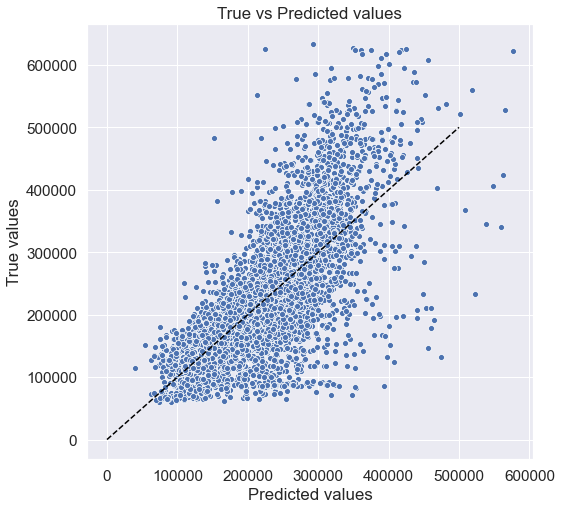

In [483]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпроцессинг
y_train_preds = np.clip(y_train_preds, a_min=40000, a_max=750000)

evaluate_preds(y_train, y_train_preds)

R2:	0.533
RMSE:	64147.45
MSE:	4114895352.306


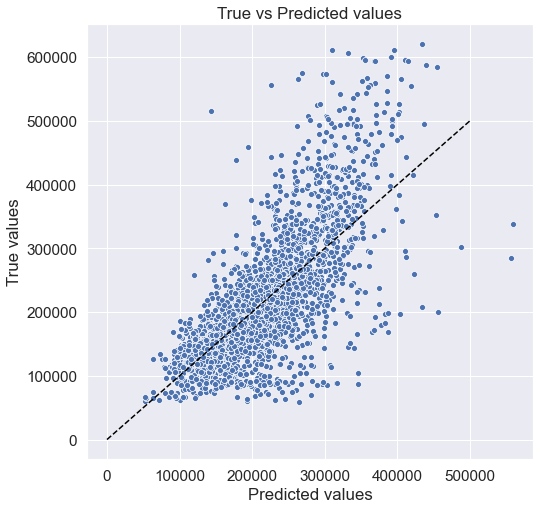

In [484]:
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
y_test_preds = np.clip(y_test_preds, a_min=40000, a_max=750000)

evaluate_preds(y_test, y_test_preds)

#### Дерево решений

R2:	0.704
RMSE:	50321.633
MSE:	2532266760.942


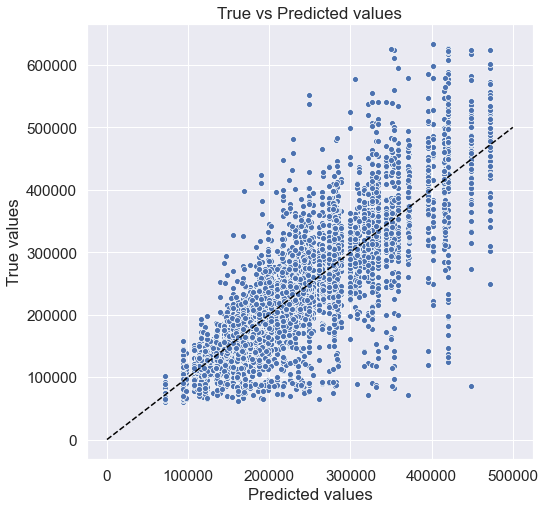

In [499]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=30, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.615
RMSE:	58272.149
MSE:	3395643332.614


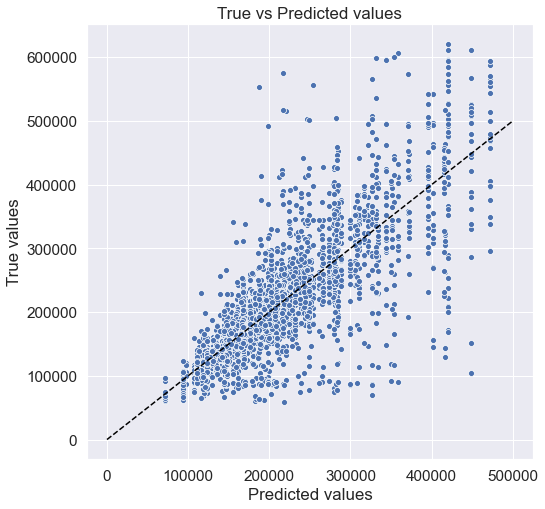

In [500]:
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

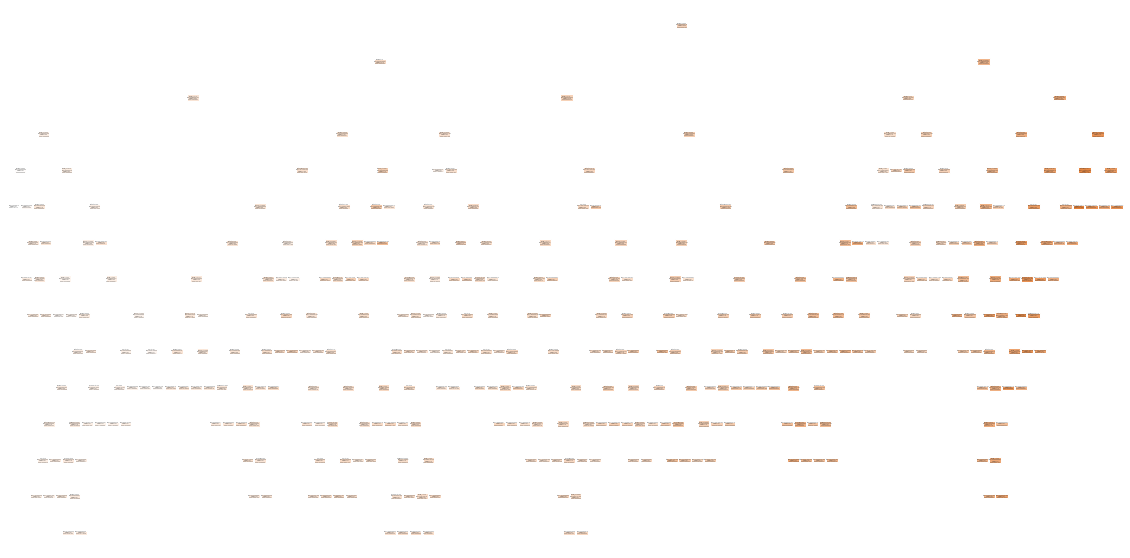

In [502]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True);

#### Случайный лес

R2:	0.712
RMSE:	49635.938
MSE:	2463726312.352


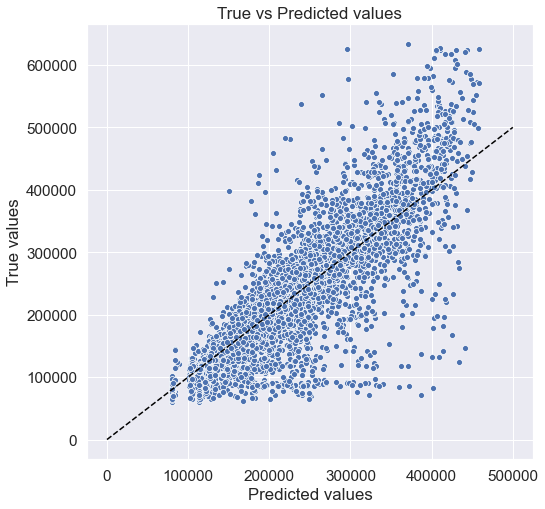

In [509]:
rf_model = RandomForestRegressor(criterion='mse', 
                                 max_depth=20,  # глубина дерева  
                                 min_samples_leaf=30,  # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100)  # кол-во деревьев

rf_model.fit(X_train, y_train)

y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.644
RMSE:	55991.316
MSE:	3135027473.906


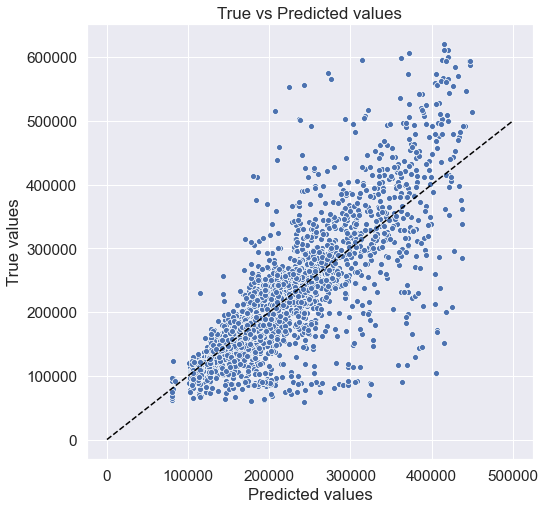

In [505]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

R2:	0.923
RMSE:	25706.945
MSE:	660846999.4


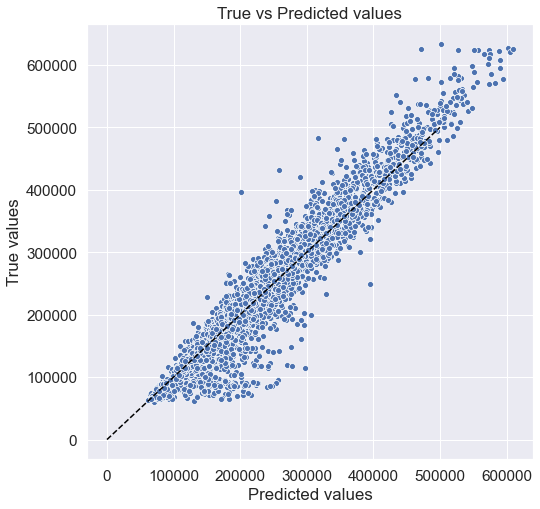

In [516]:
gb_model = GradientBoostingRegressor(criterion='mse', 
                                     max_depth=10,  # глубина дерева  
                                     min_samples_leaf=15,  # минимальное кол-во наблюдений в листе дерева
                                     random_state=42,
                                     n_estimators=100)  # кол-во деревьев

gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.71
RMSE:	50608.89
MSE:	2561259784.318


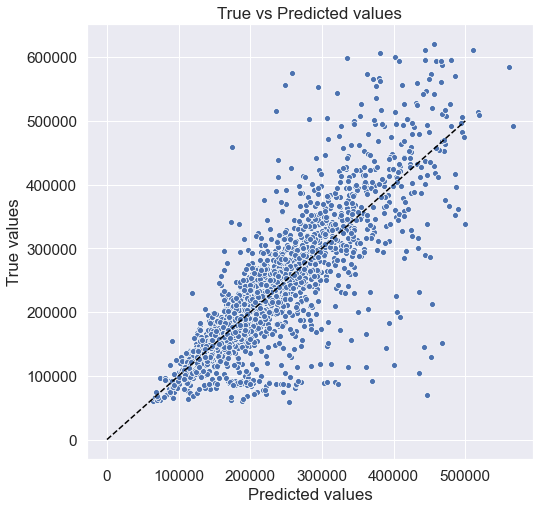

In [517]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)